# Identify Customer Segments For Online Retail With The Use Of K-Means Clustering by - Bhoomi Soni

# Goal
The objective of this project is to determine customer segmentation from a dataset of an online retail e-commerce company using K-Means Clustering, an unsupervised machine learning algorithm. By applying the K-Means Clustering technique, we can obtain several distinct clusters such as 2, 3, 4, or more, where each cluster represents a specific customer group within the online retail business.



In [1]:
# Importing all the important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#Ignore Python Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the data
retail_df = pd.read_excel("Online Retail.xlsx")
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [4]:
# shape of dataset
retail_df.shape

(541909, 8)

In [5]:
# Information about dataset and its datatype
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


 In this dataset, there are 2 columns with missing values:


In [6]:
# Descriptive statistical summary of the dataset -
retail_df.describe(include = 'all')

InvoiceNo StockCode                         Description  \
count    541909.0    541909                              540455   
unique    25900.0      4070                                4223   
top      573585.0    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq       1114.0      2313                                2369   
mean          NaN       NaN                                 NaN   
min           NaN       NaN                                 NaN   
25%           NaN       NaN                                 NaN   
50%           NaN       NaN                                 NaN   
75%           NaN       NaN                                 NaN   
max           NaN       NaN                                 NaN   
std           NaN       NaN                                 NaN   

             Quantity                    InvoiceDate      UnitPrice  \
count   541909.000000                         541909  541909.000000   
unique            NaN                            NaN            NaN   
top               NaN                            NaN            NaN   
freq              NaN                            NaN            NaN   
mean         9.552250  2011-07-04 13:34:57.156386048       4.611114   
min     -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%          1.000000            2011-03-28 11:34:00       1.250000   
50%          3.000000            2011-07-19 17:17:00       2.080000   
75%         10.000000            2011-10-19 11:27:00       4.130000   
max      80995.000000            2011-12-09 12:50:00   38970.000000   
std        218.081158                            NaN      96.759853   

           CustomerID         Country  
count   406829.000000          541909  
unique            NaN              38  
top               NaN  United Kingdom  
freq              NaN          495478  
mean     15287.690570             NaN  
min      12346.000000             NaN  
25%      13953.000000             NaN  
50%      15152.000000             NaN  
75%      16791.000000             NaN  
max      18287.000000             NaN  
std       1713.600303             NaN

## Data Cleaning and Pre-processiing


removing cash mis-macth

creating user function to convert alphabetic characters to uppercase

In [7]:
# Function to convert alphabetic characters to uppercase

def to_uppercase_alpha(val):
    if isinstance(val, str):
        return ''.join([char.upper() if char.isalpha() else char for char in val])
    return val

In [8]:
# Removing case mis-match by Standardizing all the values of string type to Uppercase() using the Function Created.

retail_df = retail_df.map(lambda x: to_uppercase_alpha(x) if isinstance(x, str) else x)

### Assignning Correct Datatype

changing datatype of **InvoiceDate** to '**CustomerId**' to 'Object' Datatype.

In [9]:
#  Changing Datatype of InvoiceDate to Datetime Datatype
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

In [10]:
# Changing datatype of CustomerID from 'float64' to 'object'
retail_df['CustomerID'] = retail_df['CustomerID'].astype('object')

In [11]:
# checking change to Dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


### Checking for Duplicates Rows


In [12]:
# checking for Duplicate Entrie in our dataset
retail_df.duplicated().sum()

5268

In [13]:
# Removing Duplicates and checking shape change
retail_df.drop_duplicates(inplace = True)
retail_df.shape

(536641, 8)

Checking For misiing value in the dataset

In [14]:
# chacking null values in the dataset
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [15]:
# Checking percantage of null values
retail_df.isna().sum()/len(retail_df)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

There are 2 columns having Missing Values

- **CustomerID** cloumns has arround 25.16%
missing value i.e  ~135k null values

- **Description** columns has arround 0.27 %
missing values i.e 1454 null values


To deal with missing values in CustomerID, which has around 25.16% of null data, We can Drop all the rows with missing CustomerID.

This decision was made because the aim of this project is to find customer segments by exploring data at customer level, therefore all observations that are not assigned to a particular customer cannot be used for analysis.




In [16]:
# Dropping all row that has null 'CustomerId'

retail_df.dropna(axis=0 , subset=['CustomerID'], inplace=True)

In [17]:
# Now,let's check the changes and remaining null values in our dataset
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
# Checking Shape change of our Dataset
retail_df.shape

(401604, 8)



By droping the null values of CustomerID column, we can see that null values of Description column also gets removed.

Thus, now we don't have any missing values in our dataset.



## Feature Engineering


In [19]:
# Creting new variable 'Total_Amount' = Quantity * UnitPrice for each other
retail_df['Total_Amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  Total_Amount  
0 2010-12-01 08:26:00       2.55    17850.0  UNITED KINGDOM         15.30  
1 2010-12-01 08:26:00       3.39    17850.0  UNITED KINGDOM         20.34  
2 2010-12-01 08:26:00       2.75    17850.0  UNITED KINGDOM         22.00  
3 2010-12-01 08:26:00       3.39    17850.0  UNITED KINGDOM         20.34  
4 2010-12-01 08:26:00       3.39    17850.0  UNITED KINGDOM         20.34

As per the data dictionary, InvoiceNo starting with a 'C' are the cancelled orders.

Thus, creating new feature variable Is_Cancelled, having value '0' if the order is Not Cancelled and value '1' if the order is Cancelled


In [20]:
## Creting new variable Is_Cancelled
retail_df['Is_Cancelled'] = retail_df['InvoiceNo'].apply(lambda x: 1 if isinstance(x, str) and x.startswith('C') else 0)
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  Total_Amount  \
0 2010-12-01 08:26:00       2.55    17850.0  UNITED KINGDOM         15.30   
1 2010-12-01 08:26:00       3.39    17850.0  UNITED KINGDOM         20.34   
2 2010-12-01 08:26:00       2.75    17850.0  UNITED KINGDOM         22.00   
3 2010-12-01 08:26:00       3.39    17850.0  UNITED KINGDOM         20.34   
4 2010-12-01 08:26:00       3.39    17850.0  UNITED KINGDOM         20.34   

   Is_Cancelled  
0             0  
1             0  
2             0  
3             0  
4             0

In [21]:
# check the value count of Cancelled Orders
retail_df['Is_Cancelled'].value_counts()

Is_Cancelled
0    392732
1      8872
Name: count, dtype: int64

In [22]:
#checking percantages of cancelled orders
retail_df['Is_Cancelled'].value_counts()/len(retail_df)*100

Is_Cancelled
0    97.790859
1     2.209141
Name: count, dtype: float64

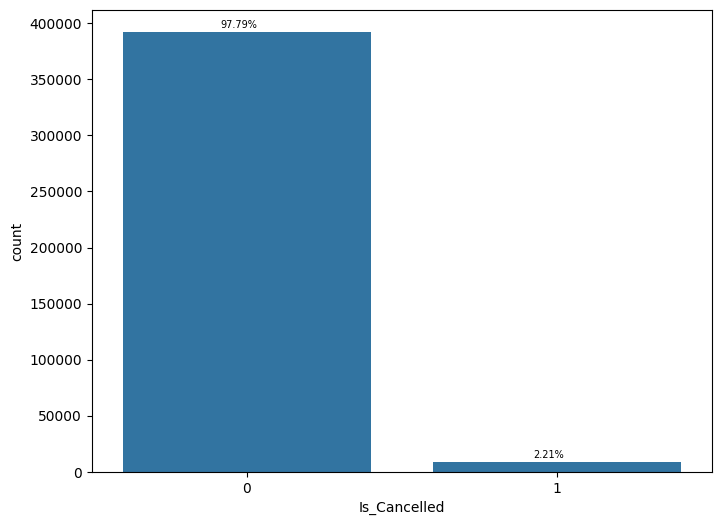

In [23]:
# visualize the Cancelled order percentage
plt.figure(figsize=[8,6])
ax = sns.countplot(x=retail_df['Is_Cancelled'],  legend='auto')
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(retail_df))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=7, color='black', xytext=(5,5),
               textcoords='offset points')
plt.show()

Their are only 2.21% of Cancelled Orders (i.e. 8872)
And rest 97.79% Orders are not cancelled (i.e. 392732)

#### Creating new Dataframe as Customer_Profile by grouping all the data by CustomerID

 let's start creating Customer_Profile by grouping data by CustomerID. This will make it easier to explore customers characteristics.**




In [24]:
# create an empty Dataframe as Cutomer_profile'
Customer_profile = pd.DataFrame()

### Calculating Total number of orders per customer i.e Freqency which is defined as how frequent is the customer in order/buying some product

In [25]:
Customer_profile['frequency'] = retail_df.groupby('CustomerID')['InvoiceNo'].count()
Customer_profile['frequency'].head()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: frequency, dtype: int64

In [26]:
# Calculating the Total Spending or order value per customer i.e. `Monetary` and storing in Dataframe `Customer_Profile`
Customer_profile['Monetary'] = retail_df.groupby(by='CustomerID')['Total_Amount'].sum()
Customer_profile['Monetary'].head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Monetary, dtype: float64

 Calculating the total item quantity ordered by each customer i.e. Quantity_per_Customer



In [27]:
Customer_profile['Quantity_per_Customer'] = retail_df.groupby(by='CustomerID')['Quantity'].sum()
Customer_profile['Quantity_per_Customer'].head()

CustomerID
12346.0       0
12347.0    2458
12348.0    2341
12349.0     631
12350.0     197
Name: Quantity_per_Customer, dtype: int64

### calculating the Average_Item_Price of all the items ordered by each customer, to see if the customer buys expensive items or not_

In [28]:
Customer_profile['Avg_Item_Price'] = retail_df.groupby(by='CustomerID')['UnitPrice'].mean()
Customer_profile['Avg_Item_Price'].head()

CustomerID
12346.0    1.040000
12347.0    2.644011
12348.0    5.764839
12349.0    8.289041
12350.0    3.841176
Name: Avg_Item_Price, dtype: float64

### Calculating Total Cancelled Orders by each customer i.e. Order_Cancellations


In [29]:
# Calculating Total Cancelled orders by each customer
Customer_profile['Order_Cancellations'] = retail_df.groupby(by='CustomerID')['Is_Cancelled'].sum()
Customer_profile['Order_Cancellations'].head()

CustomerID
12346.0    1
12347.0    0
12348.0    0
12349.0    0
12350.0    0
Name: Order_Cancellations, dtype: int64

Let's add Country of each customer in our Customer_Profile Dataframe

In [30]:
# Adding Country of each customer
Customer_profile['Country'] = retail_df.groupby(by='CustomerID')['Country'].first()
Customer_profile['Country'].value_counts()

Country
UNITED KINGDOM          3950
GERMANY                   95
FRANCE                    87
SPAIN                     29
BELGIUM                   24
SWITZERLAND               20
PORTUGAL                  19
ITALY                     15
FINLAND                   12
NORWAY                    10
NETHERLANDS                9
AUSTRIA                    9
CHANNEL ISLANDS            9
AUSTRALIA                  9
SWEDEN                     8
JAPAN                      8
DENMARK                    8
CYPRUS                     7
POLAND                     6
USA                        4
CANADA                     4
GREECE                     4
ISRAEL                     4
UNSPECIFIED                4
EIRE                       3
UNITED ARAB EMIRATES       2
BAHRAIN                    2
MALTA                      2
SAUDI ARABIA               1
SINGAPORE                  1
ICELAND                    1
RSA                        1
LEBANON                    1
BRAZIL                     1
CZECH REPUBLIC             1
EUROPEAN COMMUNITY         1
LITHUANIA                  1
Name: count, dtype: int64

In [31]:
# Let's Check how many Unique Countries are present in our dataset
Customer_profile['Country'].nunique()

37

- As we can see there are total 37 Countries from where Customers are placing Orders.
- From the values count, we can clearly see Maximum Orders are comming from UNITED KINGDOM around39 50 i.e. almost 90.35% of total orders.

 to clearly understand the Customer Location, let's check from which Continent orders are been placed

In [32]:
# let's create a Dictionary for mapping countries to their respective continents
country_to_continent = {
    'UNITED KINGDOM': 'Europe', 'GERMANY': 'Europe', 'FRANCE': 'Europe', 'SPAIN': 'Europe', 'BELGIUM': 'Europe', 'SWITZERLAND': 'Europe',
    'PORTUGAL': 'Europe', 'ITALY': 'Europe', 'FINLAND': 'Europe', 'NORWAY': 'Europe', 'NETHERLANDS': 'Europe', 'AUSTRIA': 'Europe',
    'CHANNEL ISLANDS': 'Europe', 'AUSTRALIA': 'Oceania', 'SWEDEN': 'Europe', 'JAPAN': 'Asia', 'DENMARK': 'Europe', 'CYPRUS': 'Asia',
    'POLAND': 'Europe', 'USA': 'North America', 'CANADA': 'North America', 'GREECE': 'Europe', 'ISRAEL': 'Asia', 'EIRE': 'Europe',
    'UNITED ARAB EMIRATES': 'Asia', 'BAHRAIN': 'Asia', 'MALTA': 'Europe', 'SAUDI ARABIA': 'Asia', 'SINGAPORE': 'Asia', 'ICELAND': 'Europe',
    'RSA': 'Africa', 'LEBANON': 'Asia', 'BRAZIL': 'South America', 'CZECH REPUBLIC': 'Europe', 'EUROPEAN COMMUNITY': 'Europe',
    'LITHUANIA': 'Europe', 'UNSPECIFIED': 'Unknown'}

In [33]:
# creating new Column 'Continent' based on the 'Country' column
Customer_profile['Continent'] = Customer_profile['Country'].map(country_to_continent)

In [34]:
# check the Percentage of Orders placed from different Continents
Customer_profile['Continent'].value_counts()/len(Customer_profile)*100

Continent
Europe           98.879231
Asia              0.594694
Oceania           0.205855
North America     0.182983
Unknown           0.091491
Africa            0.022873
South America     0.022873
Name: count, dtype: float64

 we can clearly see, Maximum Orders are been placed from **Europe Continent** which is around 98.88% of Total Orders.

>- _And UNITED KINGDOM is the top Country placing around 90.35% of total orders.
>- Hence, we can conclude that Country and Contient Columns are highly biased and cannot be useful in our analysis.


### thus, Lets drop both these columns to avoid any bias in our data

In [35]:
# Droping Country and Continent column from our Dataset
Customer_profile.drop(['Country', 'Continent'], axis=1 , inplace=True)

Let's create a new dataframe customer order span with column DaysA as Customer by taking the difference in days between the date of a customer's last order, and the date of their first order.

In [36]:
# Calculating the number of `Days as Customer`
customer_order_span = retail_df.groupby(by='CustomerID')['InvoiceDate'].agg(['min','max'])

customer_order_span['Days_As_Customer'] = (customer_order_span['max'] - customer_order_span['min']).dt.days
customer_order_span.head()

min                 max  Days_As_Customer
CustomerID                                                          
12346.0    2011-01-18 10:01:00 2011-01-18 10:17:00                 0
12347.0    2010-12-07 14:57:00 2011-12-07 15:52:00               365
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0

Now, Calculating the number of Days from customer's last order i.e. Recency which is defined as How recently has the customer made a transaction or ordered any product

---



In [37]:
# from Descriptive stats we can see the Max 'InvoiceDate' is 2011-12-09 12:50:00,
# Thus, lets set the `Present_date` values as '2011-12-12'
Present_date = datetime(2011,12,12)
print(Present_date)

2011-12-12 00:00:00


In [38]:
# Now, calculating `Recency` by taking the difference in days between the set `Present_date` and the date of customer's last order.
customer_order_span['Recency'] = (Present_date - customer_order_span['max']).dt.days
customer_order_span.head()

min                 max  Days_As_Customer  Recency
CustomerID                                                                   
12346.0    2011-01-18 10:01:00 2011-01-18 10:17:00                 0      327
12347.0    2010-12-07 14:57:00 2011-12-07 15:52:00               365        4
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282       77
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0       20
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0      312

Now, Droping column min and max from customer_order_span as its not required further.

In [39]:
# Droping column `min` and `max` from `customer_order_span` as its not required further.
customer_order_span.drop(['min','max'], axis=1 , inplace=True)

# Checking head of 'customer_order_span'
customer_order_span.head()

Days_As_Customer  Recency
CustomerID                           
12346.0                    0      327
12347.0                  365        4
12348.0                  282       77
12349.0                    0       20
12350.0                    0      312

Now, Let's Merge customer_order_span to Customer_Profile  Dataframe_

In [40]:
Customer_profile = pd.merge(Customer_profile , customer_order_span, on='CustomerID')
Customer_profile.head()

frequency  Monetary  Quantity_per_Customer  Avg_Item_Price  \
CustomerID                                                               
12346.0             2      0.00                      0        1.040000   
12347.0           182   4310.00                   2458        2.644011   
12348.0            31   1797.24                   2341        5.764839   
12349.0            73   1757.55                    631        8.289041   
12350.0            17    334.40                    197        3.841176   

            Order_Cancellations  Days_As_Customer  Recency  
CustomerID                                                  
12346.0                       1                 0      327  
12347.0                       0               365        4  
12348.0                       0               282       77  
12349.0                       0                 0       20  
12350.0                       0                 0      312

In [41]:
# Checking Shape of `Customer_Profile`
Customer_profile.shape

(4372, 7)

>After merging, Our final Customer_Profile` dataset contains the following variables:
>- CustomrID : Customer unique identierfier (_used are Row Index_)
>- Frequency : Total number Orders made by each customer.
>- Monetary : Total amount or Order value spend by each customer.
>- Quantity_per_Customer : Total Quantity of orders placed by each customer.
>- Avg_Item_Price : Average price of items purchased by the customer.
>- Order_Cancellations : Total number of orders cancelled by each customer.
>- Days_As_Customer : Total number of days between first and last order placed by the customer
>- Recency : Number of days since customer’s last order.

We can Export these Customer Profile Dataframe to a CSV file for Future Analysis or for Data Visulization using tools like Tableau or PowerBI




## Data analysis and visualization

#### sepreate all the numerical and categorical variables

In [42]:
# Storing all the Numerical Column names into `num_var` variables
num_var = Customer_profile.select_dtypes(include='number').columns
print(num_var)

# Similarly, storing all the Categorical Column names into `cat_var` variables, if any.
cat_var = Customer_profile.select_dtypes(include='object').columns
print(cat_var)

Index(['frequency', 'Monetary', 'Quantity_per_Customer', 'Avg_Item_Price',
       'Order_Cancellations', 'Days_As_Customer', 'Recency'],
      dtype='object')
Index([], dtype='object')


In [43]:
# Creating a function for ploting Boxplot and Histogram Graph for Outlier analysis

def plot_box_histogram(column_name):
    plt.figure(figsize=[12,3])
    plt.subplot(1,2,1)
    sns.boxplot(x=column_name)
    plt.title(f"Boxplot of '{column_name.name}' ")

    plt.subplot(1,2,2)
    sns.histplot(x=column_name, kde=True)
    plt.title(f"Distribution of '{column_name.name}' ")
    plt.axvline(column_name.mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(column_name.median(), color='g', linestyle='dashed', linewidth=1, label='Median')
    plt.legend()

    plt.show()
    print(f'\n')


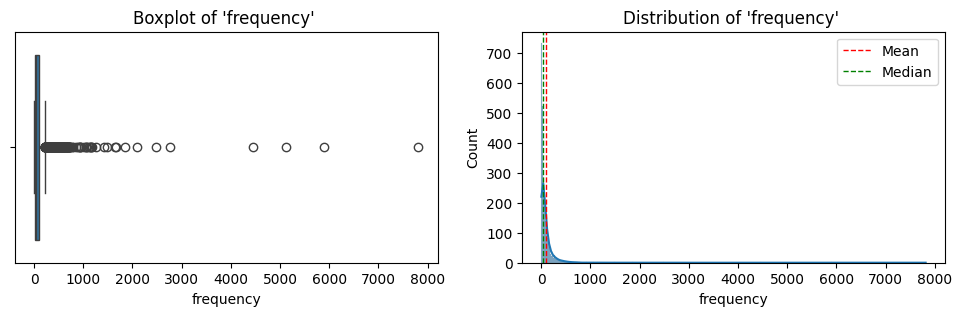

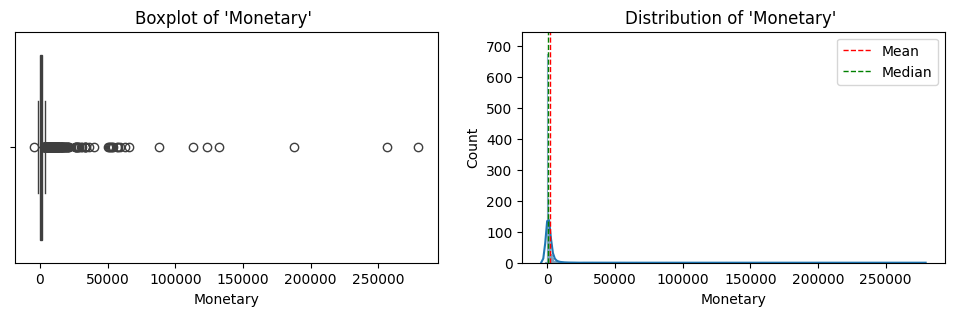

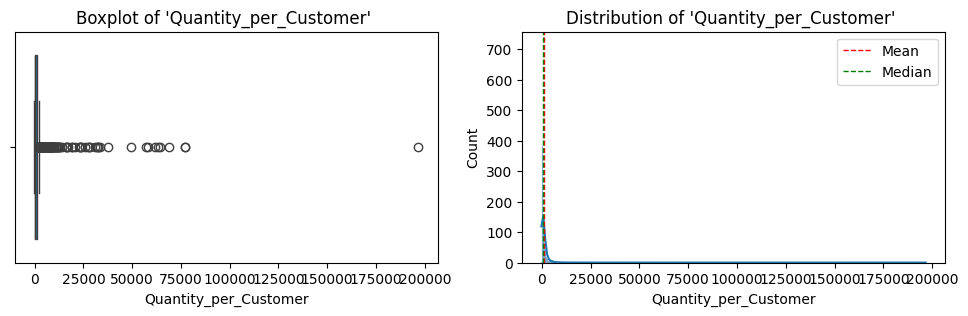

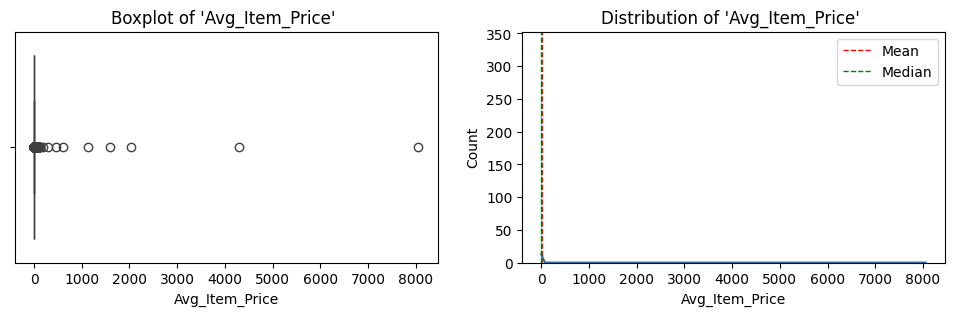

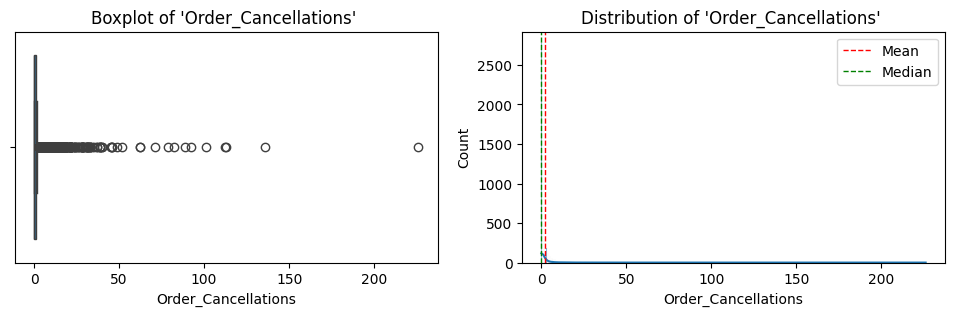

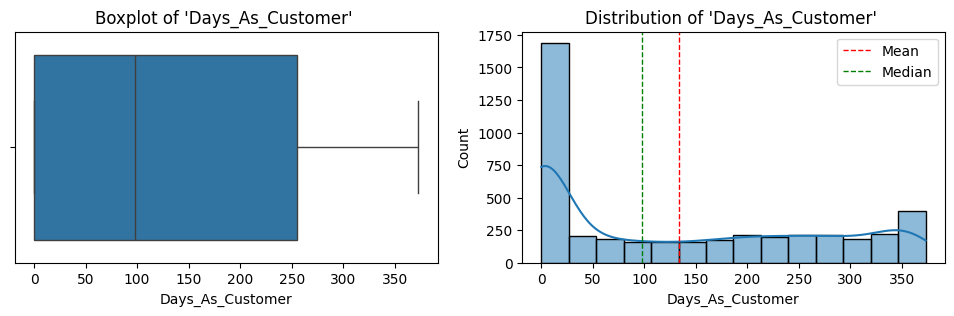

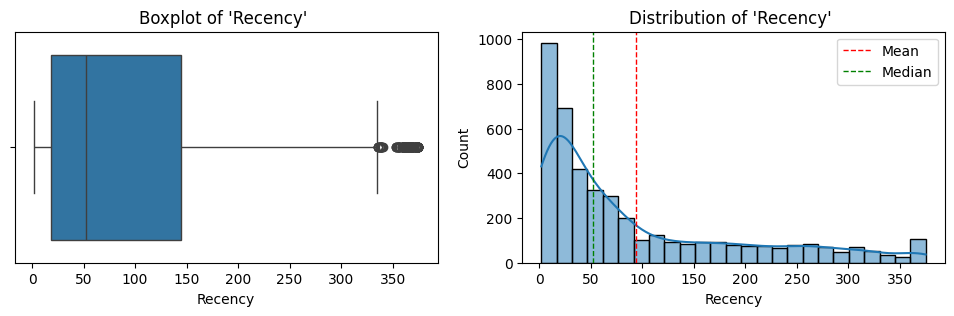

In [44]:
# Now lets Visualize the distribution of Data across all numerical Columns
for col in num_var:
    plot_box_histogram(Customer_profile[col])

> Insight

>- From all the above, Boxplot and Histogram charts, we can see there are lots of Outliers in many numerical columns.
>- To get the Accurate analysis and customer segments we need to treat these Outliers before applying K-Means algorithm.

 visualize Percentile



scatterplot of all numerical variables, for better understanding of Outliers.

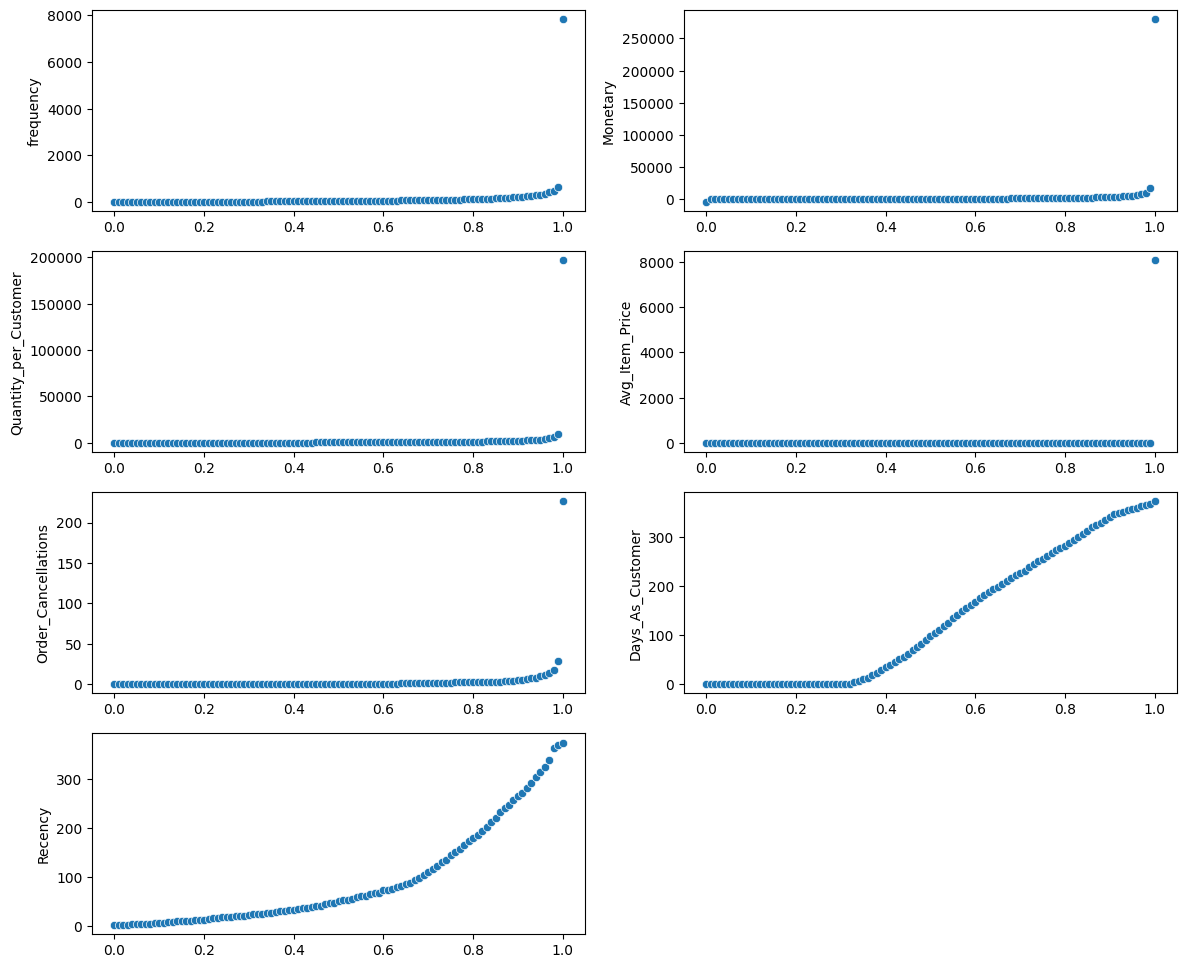

In [45]:
# Creating scatterplot of percentile, to check for outliers in all numerical columns.

i = 1
plt.figure(figsize=[14,12])
for col in num_var:
    plt.subplot(4,2,i)
    sns.scatterplot(Customer_profile[col].quantile( np.arange(0, 1.01, 0.01) ))
    i = i+1
plt.show()


Insight
>- From the Quantile plot of all numerical variables we can clearly conclude that, their are some Outliers in our Customer Profile Dataset.
>- We can see, Some Positive Outliers in Frequency, Monetary, Quantity_per_Customer, Avg_Item_Price and Order_Cancellations.
>- Also, we can see, there are Some Negative Outliers in Monetary, Quantity_per_Customer
>- Thus, let's handle these outliers before applying K-Means Clustering Algorithm

## Handling Outliers in numerical columns

Outliers are extreme values that deviate from the normal range of values in a dataset. Outliers can distort the results of data analysis, and should be identified and treated accordingly. Their are many techniques to handle outliers in the dataset.

One of the common technique to treat outliers is by using statistical methods like IQR (Interquartile Range)

So, lets create a new function to calculate IQR (Interquartile Range) for easy calculation.




In [46]:
#Creating a function to calculate IQR (Inter Quartile range) along with IQR Upper and Lower limit, of any column

def IQR_Limits(column_name):
    IQR_Q1 = column_name.quantile(0.25)
    IQE_Q3 = column_name.quantile(0.75)
    IQR_value = IQE_Q3 - IQR_Q1

    IQR_lower_limit = IQR_Q1 - 1.5*IQR_value
    IQR_upper_limit = IQE_Q3 + 1.5*IQR_value

    return print(f"IQR Value is: {IQR_value} \nIQR Lower Limit is: {IQR_lower_limit} \nIQR Upper Limit is: {IQR_upper_limit}")



 Outlier Analysis of Frequency column


Frequency : Total number Orders made by each customer




In [47]:
# Checking IRQ limits of 'Frequency' using function.
IQR_Limits(Customer_profile['frequency'])

IQR Value is: 82.25 
IQR Lower Limit is: -106.375 
IQR Upper Limit is: 222.625


In [48]:
# Capping all the Outliers values in `Frequency` Column to the IQR Upper Limit
Customer_profile.loc[Customer_profile['frequency']> 222.625 , ['frequency'] ] = 222.625

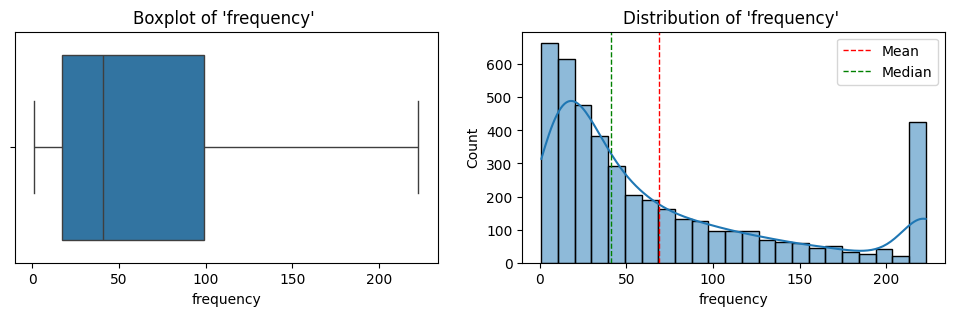

In [49]:
# visualize the change in distribution of 'Frequency'
plot_box_histogram(Customer_profile['frequency'])

Outlier Analysis of Monetary column

Monetary : Total amount or Order value spend by each customer i.e. Total Spending






In [50]:
# Checking IRQ limits of 'Monetary' using function.
IQR_Limits(Customer_profile['Monetary'])

IQR Value is: 1316.54 
IQR Lower Limit is: -1683.0149999999999 
IQR Upper Limit is: 3583.145


In [51]:
# Now, Capping all the highest values to the IQR Upper Limit
Customer_profile.loc[Customer_profile['Monetary']> 3583.145 , ['Monetary'] ] = 3583.145

In [52]:
# Now, Flooring all the negative values to 0, as it indicate Order Returns & Cancellation, which is already been captured by `Order_Cancellations` column.
Customer_profile.loc[Customer_profile['Monetary'] < 0 , ['Monetary'] ] = 0

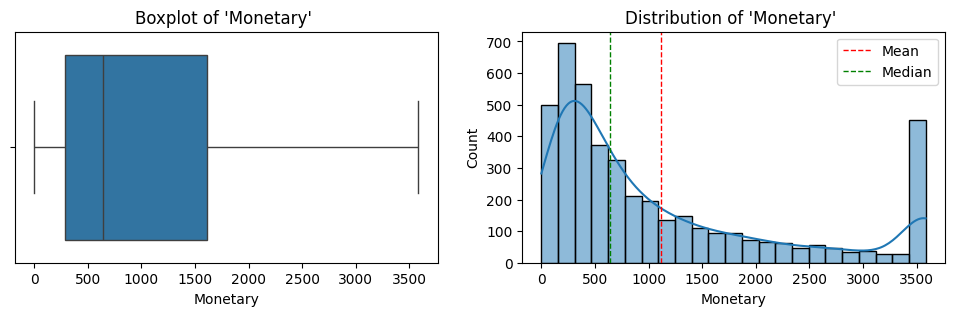

In [53]:
# visualize the change in dustribution of 'Total_Spending'
plot_box_histogram(Customer_profile['Monetary'])

 - Analysis of Quantity_per_Customer column

Quantity_per_Customer : Total Quantity of orders placed by each customer



In [54]:
# Checking IRQ limits of 'Quantity_per_Customer' using function.
IQR_Limits(Customer_profile['Quantity_per_Customer'])

IQR Value is: 804.5 
IQR Lower Limit is: -1055.0 
IQR Upper Limit is: 2163.0


In [55]:
#Capping all the highest values to the IQR Upper Limit
Customer_profile.loc[Customer_profile['Quantity_per_Customer']> 2163.0 , ['Quantity_per_Customer'] ] = 2163.0

In [56]:
# Flooring all the negative values to 0, as it indicate Order Returns & Cancellation, which is already been captured by `Order_Cancellations` column.
Customer_profile.loc[Customer_profile['Quantity_per_Customer'] < 0 , ['Quantity_per_Customer'] ] = 0

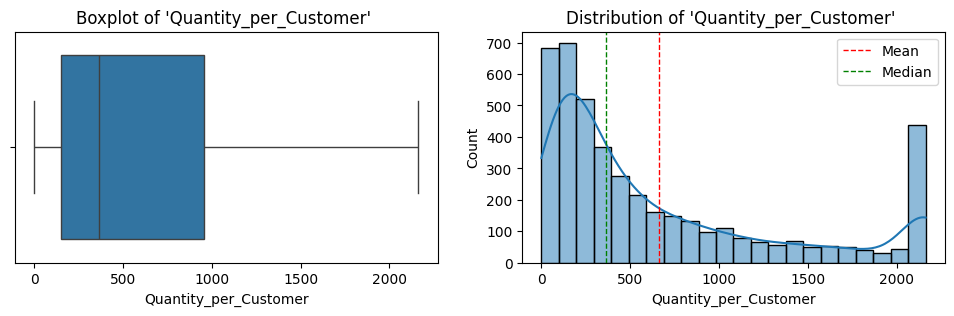

In [57]:
# visualize the change in dustribution of 'Quantity_per_Customer'
plot_box_histogram(Customer_profile['Quantity_per_Customer'])

Analysis of Avg_Item_Price column

Avg_Item_Price : Average price of items purchased by the Customer



In [58]:
# Checking IRQ limits of 'Avg_Item_Price' using function.
IQR_Limits(Customer_profile['Avg_Item_Price'])

IQR Value is: 1.673467489759768 
IQR Lower Limit is: -0.2847204767011724 
IQR Upper Limit is: 6.4091494823379


In [59]:
# Capping all the highest values to the IQR Upper Limit
Customer_profile.loc[Customer_profile['Avg_Item_Price'] > 6.409 , ['Avg_Item_Price'] ] = 6.409

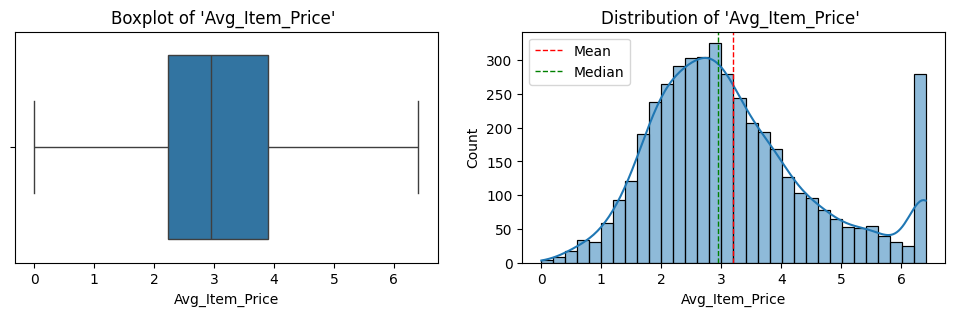

In [60]:
# visualize the change in dustribution of 'Avg_Item_Price'
plot_box_histogram(Customer_profile['Avg_Item_Price'])

5.5 : Analysis of Order_Cancellations



column Order_Cancellations : Total number of orders cancelled by each customer




In [61]:
# Checking IRQ limits of 'Order_Cancellations' using function.
IQR_Limits(Customer_profile['Order_Cancellations'])

IQR Value is: 1.0 
IQR Lower Limit is: -1.5 
IQR Upper Limit is: 2.5


In [62]:
# Capping all the highest values to the IQR Upper Limit
Customer_profile.loc[Customer_profile['Order_Cancellations'] > 2.5 , ['Order_Cancellations'] ] = 2.5

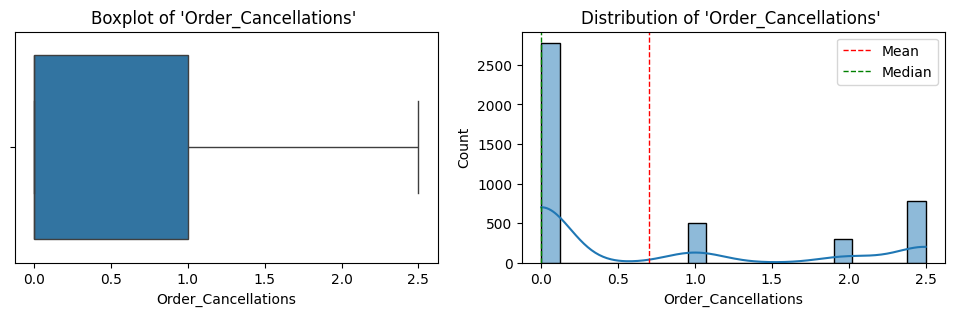

In [63]:
#visuali ze the change in dustribution of 'Order_Cancellations'
plot_box_histogram(Customer_profile['Order_Cancellations'])

Analysis of Days_A_customer

Days_A_Customer: Number of days between first and last order placed by the customer

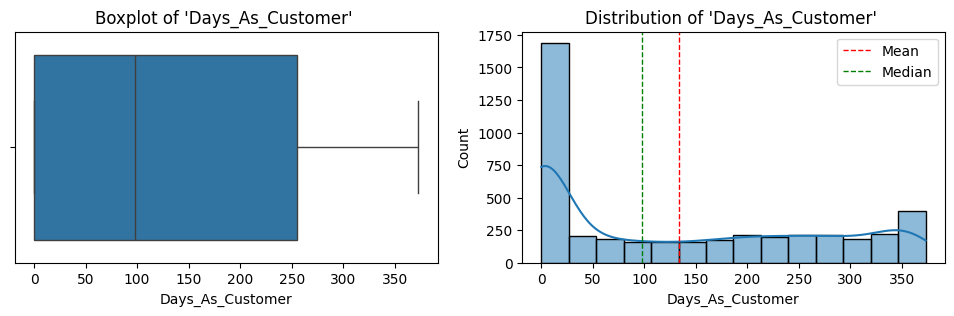

In [64]:
# visualize the change in dustribution of 'Days_As_Customer'
plot_box_histogram(Customer_profile['Days_As_Customer'])

Insight


From above charts and Quantile Plot of Days_As_Customer Column, we can say that their are No visual Outliers


### Analysis of Recency column


Recency : Number of days since customer’s last order.

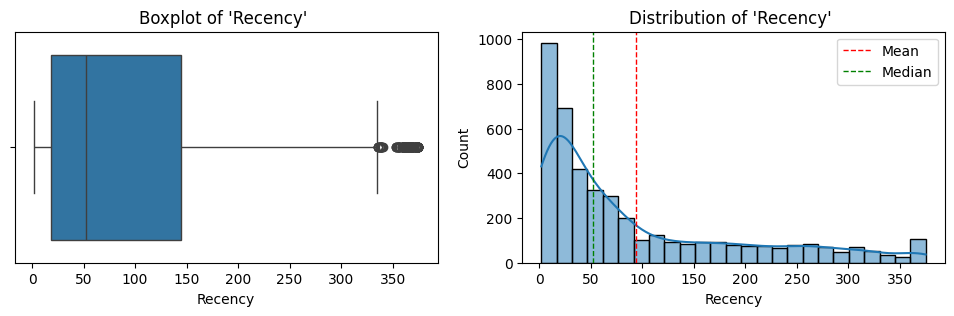

In [65]:
# visualize the change in dustribution of 'Order_Cancellations'
plot_box_histogram(Customer_profile['Recency'])

Insight,

From above charts and distribution of Recency Column, we can say that their are No visual Outliers.



In [66]:
#Check Descriptive Statistical Summary of our dataset
Customer_profile.describe()

frequency     Monetary  Quantity_per_Customer  Avg_Item_Price  \
count  4372.000000  4372.000000            4372.000000     4372.000000   
mean     68.894671  1116.609651             661.368481        3.201306   
std      68.375966  1113.157203             679.090365        1.378429   
min       1.000000     0.000000               0.000000        0.000000   
25%      17.000000   291.795000             151.750000        2.225481   
50%      41.000000   644.070000             364.000000        2.947169   
75%      99.250000  1608.335000             956.250000        3.898948   
max     222.625000  3583.145000            2163.000000        6.409000   

       Order_Cancellations  Days_As_Customer      Recency  
count          4372.000000       4372.000000  4372.000000  
mean              0.701167        133.385865    93.581199  
std               1.009713        132.845467   100.772139  
min               0.000000          0.000000     2.000000  
25%               0.000000          0.000000    18.000000  
50%               0.000000         97.500000    52.000000  
75%               1.000000        255.250000   145.000000  
max               2.500000        373.000000   375.000000

## Visualize 'Customer_Profile' dataset using Pairplot





using Pairplot, also known as a scatterplot matrix, we can visualize relationships between all the variables in a dataset with one another.







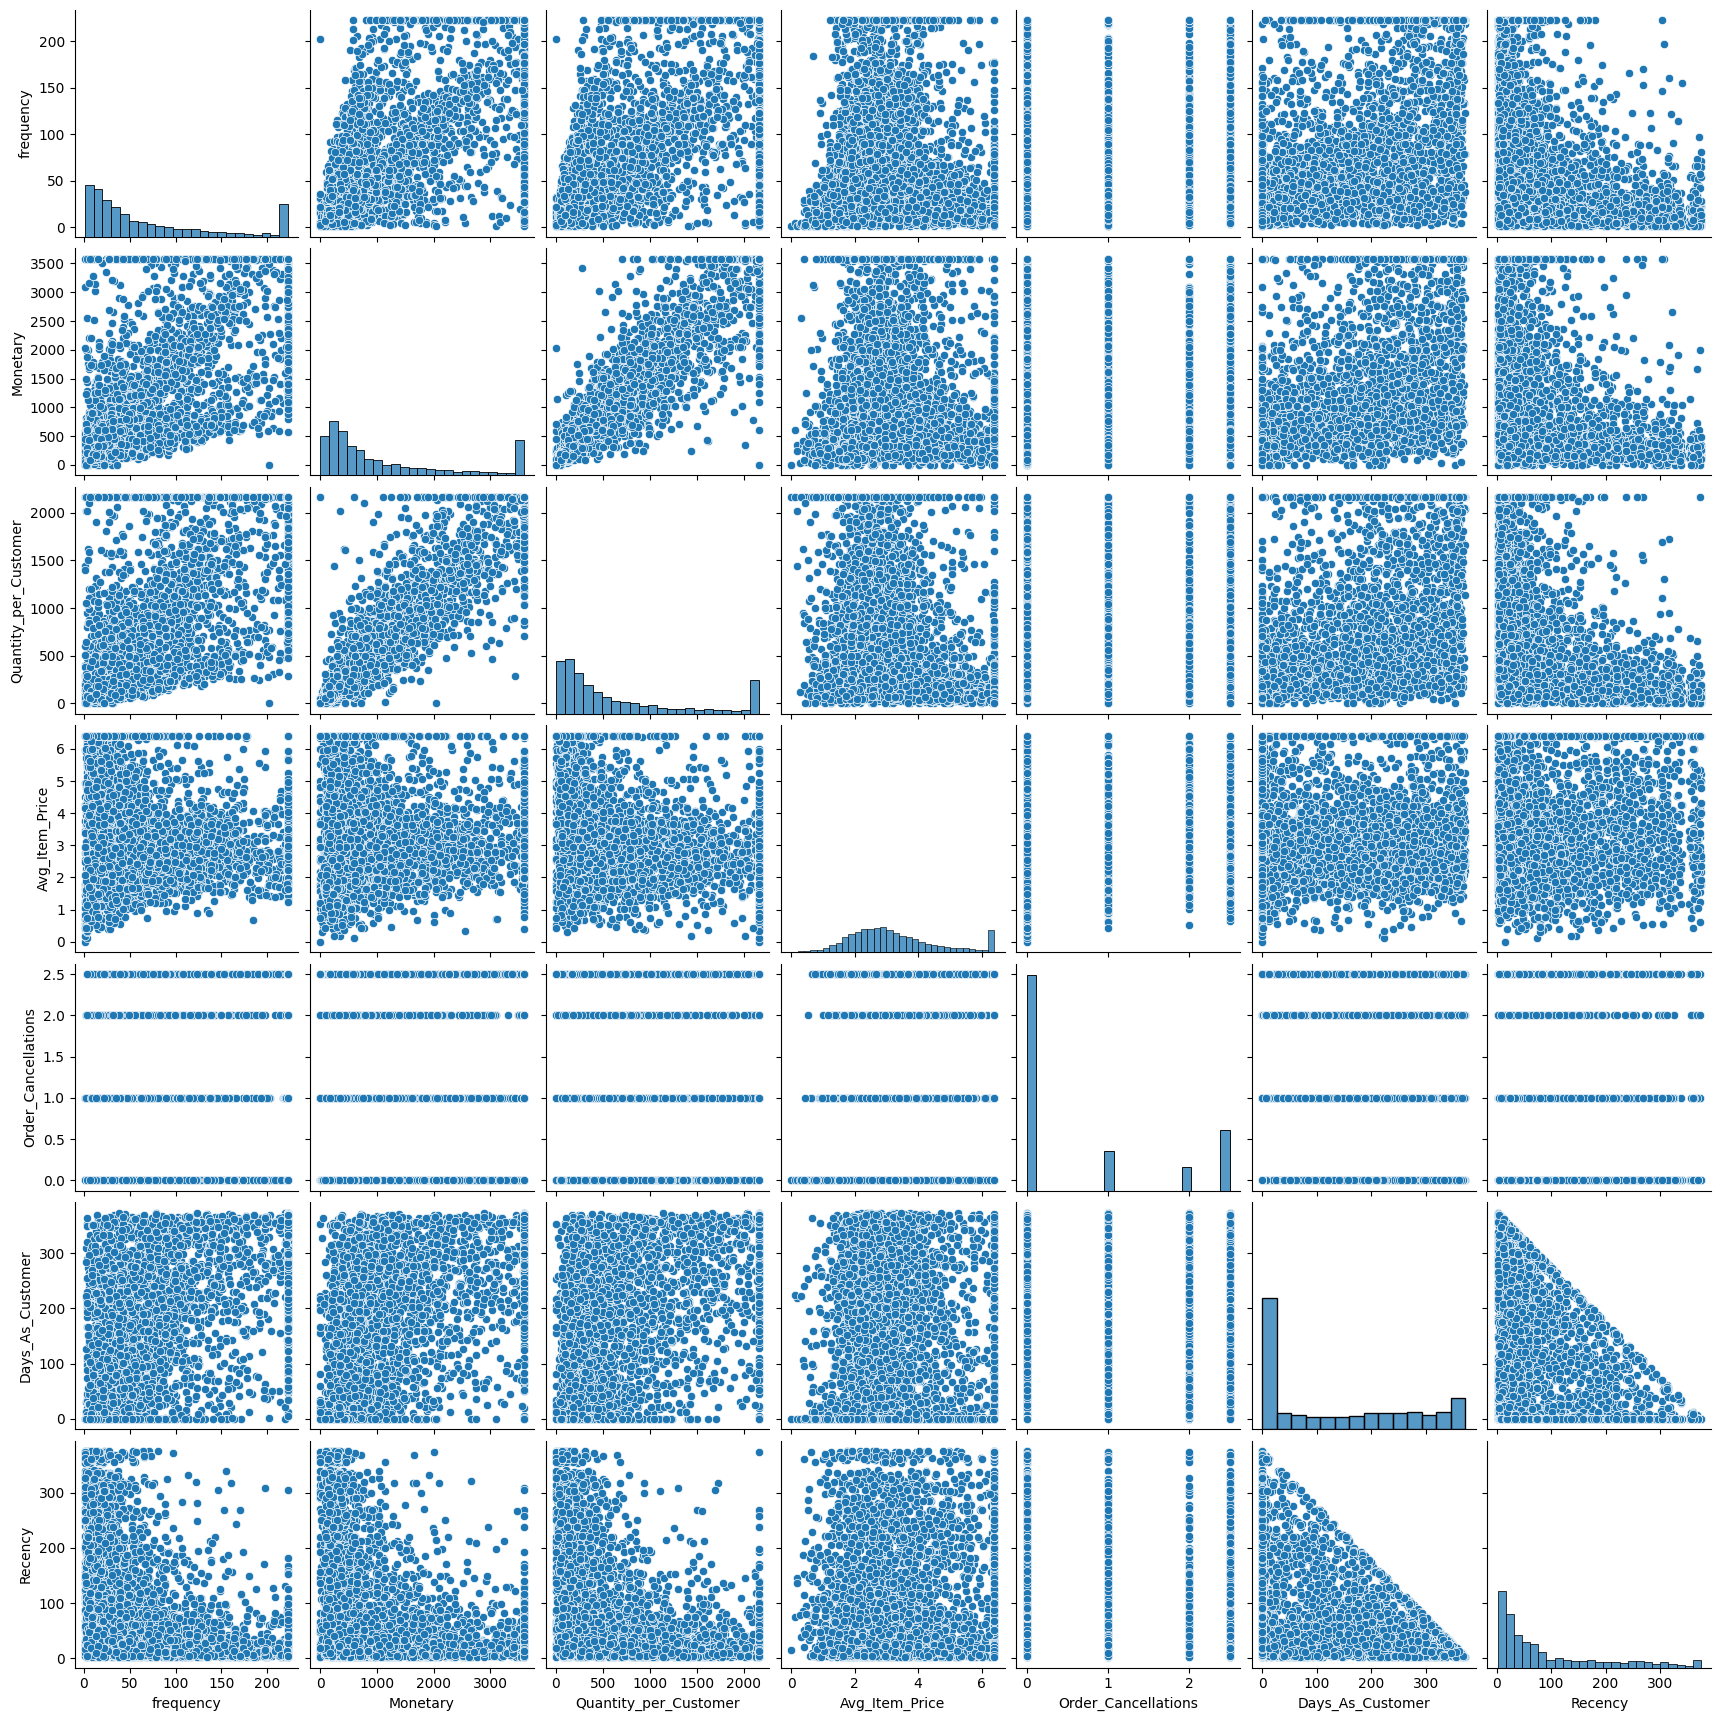

In [67]:
# Creating `Pairplot` to visualize the relation of all varaiables with eachother using scattered plot.
sns.pairplot(Customer_profile, kind='scatter')
plt.show()

## Correlation Matrix of 'Customer Profile'

## Create Correlation Matrix of all numeric variables of Customer_Profile Dataset

In [68]:
# Creating Correlation Matrix of all numeric variables in `Customer_Profile` Dataset
Customer_profile[num_var].corr()

frequency  Monetary  Quantity_per_Customer  \
frequency               1.000000  0.782275               0.763166   
Monetary                0.782275  1.000000               0.934837   
Quantity_per_Customer   0.763166  0.934837               1.000000   
Avg_Item_Price         -0.119352 -0.008782              -0.182421   
Order_Cancellations     0.436051  0.482066               0.450881   
Days_As_Customer        0.631940  0.656250               0.625176   
Recency                -0.420520 -0.408872              -0.411270   

                       Avg_Item_Price  Order_Cancellations  Days_As_Customer  \
frequency                   -0.119352             0.436051          0.631940   
Monetary                    -0.008782             0.482066          0.656250   
Quantity_per_Customer       -0.182421             0.450881          0.625176   
Avg_Item_Price               1.000000             0.098239         -0.017441   
Order_Cancellations          0.098239             1.000000          0.434999   
Days_As_Customer            -0.017441             0.434999          1.000000   
Recency                      0.139245            -0.218874         -0.515716   

                        Recency  
frequency             -0.420520  
Monetary              -0.408872  
Quantity_per_Customer -0.411270  
Avg_Item_Price         0.139245  
Order_Cancellations   -0.218874  
Days_As_Customer      -0.515716  
Recency                1.000000

### Now, let's visualize the Correlation Matrix using Heatmap plot



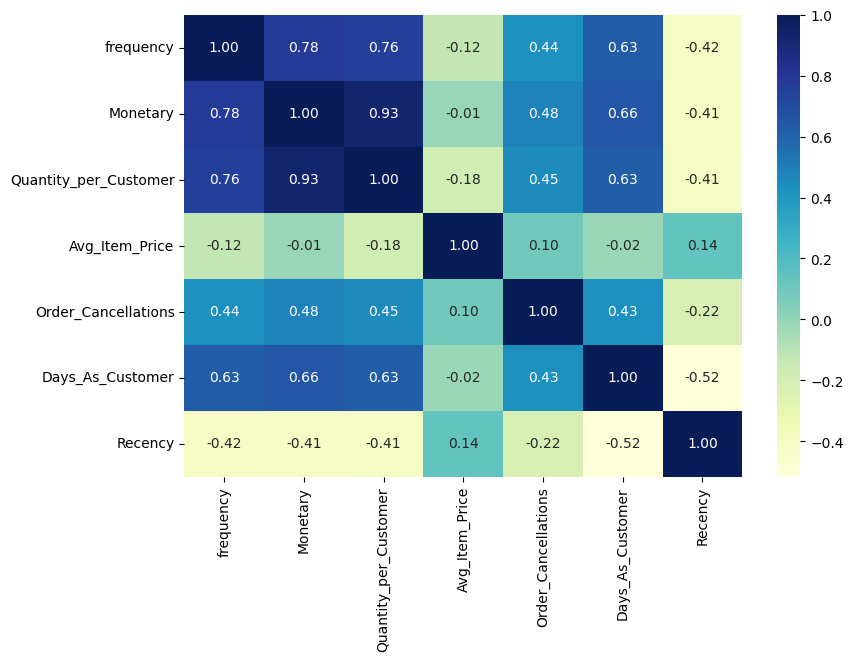

In [69]:
# Creating heatmap of correlation matrix for all numeric variables of 'Customer Profile' Dataset
plt.figure(figsize=[9,6])
sns.heatmap(Customer_profile[num_var].corr(), cmap="YlGnBu", annot = True, fmt=".2f" )
plt.show()



**Insight,**
> **From the correlation matrix of `customer profile` we can see:**
>- **Frequency and Monetary (0.78):** There's a strong positive correlation between how frequently a customer purchases and their total spending (Monetary). This suggests that customers who buy more often tend to spend more overall.
>- **Frequency and Quantity_per_Customer (0.76):** This strong positive correlation indicates that customers who purchase more frequently also tend to buy more items per transaction.
>- **Monetary and Quantity_per_Customer (0.93):** This very strong correlation shows that customers who spend more also purchase a higher quantity of items. Monetary value is closely tied to the number of items bought.
>- **Frequency and Days_As_Customer (0.63):** The more days a customer has been with the company, the more frequently they make purchases. Long-standing customers tend to be more engaged.
>- **Order Cancellations and Monetary/Frequency (0.48 and 0.44):** There is a moderate positive correlation between order cancellations and both monetary value and frequency. This might indicate that higher purchasing customers are more likely to cancel orders, possibly due to higher involvement with the brand.
>- **Recency and Frequency (-0.42):** A negative correlation suggests that customers who have purchased more recently are likely to have a lower frequency of past purchases. This may reflect that more recent purchasers are newer or less frequent customers.
>- **Days_As_Customer and Recency (-0.52):** Customers who have been with the company longer tend to have a higher recency score, meaning they are less likely to have made recent purchases. This could indicate a drop in engagement over time.
>- **Avg_Item_Price and Quantity_per_Customer (-0.18):** A weak negative correlation shows that customers who purchase more items tend to spend slightly less per item, possibly indicating bulk or lower-cost purchases.
>- **Order Cancellations and Recency (-0.22):** There's a weak negative correlation here, implying that customers who recently made a purchase are less likely to cancel their orders.


# Model Building

 ### Standardize the Dataset by Feature Scaling
Standardizing the data to ensure that each feature contributes equally to the distance calculations in K-Means, by scaling all the Features.
>- **Standardization:** using **StandardScaler** is one of the several methods of scaling data.
>- **In Standardization, The Mean of each feature becomes 0 and the Standard Deviation becomes 1.**

####  : Creating copy of our Dataset to store the Scaled values

In [70]:
##  create a new dataframe to store our Scaled Dataset.
Customer_profile_scaled = pd.DataFrame(Customer_profile[num_var])
Customer_profile_scaled.head()

frequency  Monetary  Quantity_per_Customer  Avg_Item_Price  \
CustomerID                                                               
12346.0           2.0     0.000                      0        1.040000   
12347.0         182.0  3583.145                   2163        2.644011   
12348.0          31.0  1797.240                   2163        5.764839   
12349.0          73.0  1757.550                    631        6.409000   
12350.0          17.0   334.400                    197        3.841176   

            Order_Cancellations  Days_As_Customer  Recency  
CustomerID                                                  
12346.0                     1.0                 0      327  
12347.0                     0.0               365        4  
12348.0                     0.0               282       77  
12349.0                     0.0                 0       20  
12350.0                     0.0                 0      312

### Importing StandardScaler Library and fit_transforming our dataset.

In [71]:
# Importing StandardScaler from sklearn.preprocessing to standardize the features.
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler to our dataset and Transforming the data into new Variable.
Customer_profile_scaled[num_var] = scaler.fit_transform(Customer_profile[num_var])

In [72]:
# check the Descriptive Statistical Summary of our Scaled Dataset

In [73]:
# Checking the Descriptive statistical summary of our Scaled Dataset
Customer_profile_scaled.describe()

frequency      Monetary  Quantity_per_Customer  Avg_Item_Price  \
count  4.372000e+03  4.372000e+03           4.372000e+03    4.372000e+03   
mean   2.844121e-17  6.500848e-17          -3.900509e-17    6.500848e-17   
std    1.000114e+00  1.000114e+00           1.000114e+00    1.000114e+00   
min   -9.930746e-01 -1.003216e+00          -9.740149e-01   -2.322697e+00   
25%   -7.590475e-01 -7.410535e-01          -7.505286e-01   -7.080070e-01   
50%   -4.080068e-01 -4.245525e-01          -4.379424e-01   -1.843888e-01   
75%    4.439981e-01  4.417899e-01           4.342798e-01    5.061716e-01   
max    2.248567e+00  2.216055e+00           2.211493e+00    2.327331e+00   

       Order_Cancellations  Days_As_Customer       Recency  
count         4.372000e+03      4.372000e+03  4.372000e+03  
mean         -5.850764e-17      6.825891e-17 -4.956897e-17  
std           1.000114e+00      1.000114e+00  1.000114e+00  
min          -6.945010e-01     -1.004183e+00 -9.088988e-01  
25%          -6.945010e-01     -1.004183e+00 -7.501066e-01  
50%          -6.945010e-01     -2.701633e-01 -4.126731e-01  
75%           2.959927e-01      9.174425e-01  5.103066e-01  
max           1.781733e+00      1.803912e+00  2.792944e+00

### Check the Mean and Standard Deviation of scaled dataset.



In [74]:
Customer_profile_scaled.describe().loc[['mean', 'std'], :]

frequency      Monetary  Quantity_per_Customer  Avg_Item_Price  \
mean  2.844121e-17  6.500848e-17          -3.900509e-17    6.500848e-17   
std   1.000114e+00  1.000114e+00           1.000114e+00    1.000114e+00   

      Order_Cancellations  Days_As_Customer       Recency  
mean        -5.850764e-17      6.825891e-17 -4.956897e-17  
std          1.000114e+00      1.000114e+00  1.000114e+00

Insight

By using Standardization scaling method, we can see that the Standard Deviation of all the variables in our dataset has becomes 1 and the Mean of each feature has becomes 0


 ## Determining the Optimal Number of Clusters

 i.e. Determining Value of K using The Elbow Method

>- First step of the K-Means Clustering algorithm is deciding the number of clusters we want, to divided our Dataset into.
>- There are several methods that help us in deciding which "k" values is most suited to the dataset.
>- One method that determines an appropriate "k" value, is the "Elbow Method". The elbow method works by running k-means clustering for a range of values of "k" (from 1 to 10), and for each value of "k", it calculates the Within-Cluster Sum of Squares (WCSS).
>- The method then plots WCSS's for each value of "k", from the plot we can select the smallest value of "k" that still has a small WCSS.

In [75]:
## Importing reqired libraries

from sklearn import cluster, metrics
from sklearn.cluster import KMeans

### Using Elbow Method finding the Within-Cluster Sum of Squares

In [76]:
# Using Elbow Method find the within-cluster sum of squares (WCSS)

# Defining our Scaled Dataset, to run in the loop
X = Customer_profile_scaled

# creating empty list to store within-cluster sum of squares (WCSS) for different values of K
WCSS = []

# Starting for loop runs on range between 1 and 11
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=10)    # set up K-means for each K between 1 and 11
    kmeans.fit(X)                 # fit K-means on our dataset
    WCSS.append(kmeans.inertia_)  # append WCSS values into empty list

#Checking vaulues in WCSS
print(WCSS)

[30603.999999999975, 18243.364319152497, 14882.60215852964, 12788.392864506857, 11323.997740814642, 10046.28974002323, 9119.442220727511, 8545.112608137491, 8087.462849573682, 7684.364544068052]


## Now, Let's plot the WCSS against the number of clusters and look for the "elbow point" where the WCSS starts to decrease more slowly.


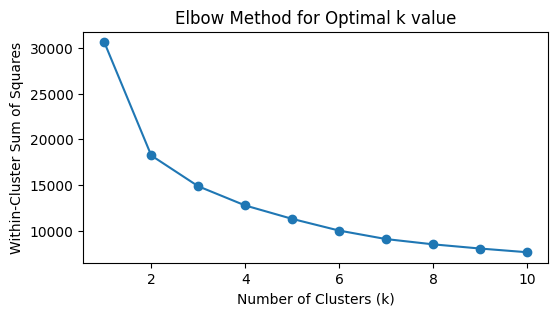

In [77]:
# Now Visualizing 'Elbow Curve' to determine the optimal number of clusters.
plt.figure(figsize=[6, 3])
plt.plot(range(1, 11), WCSS, marker='o')
plt.title('Elbow Method for Optimal k value')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

Insight

>- On visual inspection, we can see there is a significant drop from **k=1** to **k=2** (from 30604.0 to 18243.28).
>- The drop from **k=2** to **k=3** is still substantial but less steep (from 18243.28 to 14882.58).
>- From **k=3** to **k=4**, the decrease slows down (14882.58 to 12788.19).
>- After **k=4**, the rate of decline becomes even more gradual.
>- Thus we can conclude, **The most significant drop in WCSS occurs before k=3**, indicating that 3-clusters capture most of the variation in the data.
>
### Optimal K value = 3 , appears to be the optimal choice based on the Elbow Method.

In [78]:
# the Elbow method, setting the optimal K value as 3
optimal_k = 3

### Creating K-mean Model using Optimal K value


In [79]:
# Creating K-means model
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=10)
kmeans

KMeans(n_clusters=3, n_init=10, random_state=10)

In [80]:
# Apply K-means clustering on Scaled Dataset
Customer_profile_scaled['Pred_cluster'] = kmeans.fit_predict(X)

# Checking head of dataset
Customer_profile_scaled.head()

frequency  Monetary  Quantity_per_Customer  Avg_Item_Price  \
CustomerID                                                               
12346.0     -0.978448 -1.003216              -0.974015       -1.568129   
12347.0      1.654357  2.216055               2.211493       -0.404344   
12348.0     -0.554274  0.611511               2.211493        1.859962   
12349.0      0.060047  0.575852              -0.044724        2.327331   
12350.0     -0.759048 -0.702775              -0.683888        0.464256   

            Order_Cancellations  Days_As_Customer   Recency  Pred_cluster  
CustomerID                                                                 
12346.0                0.295993         -1.004183  2.316568             2  
12347.0               -0.694501          1.743685 -0.889050             0  
12348.0               -0.694501          1.118827 -0.164560             0  
12349.0               -0.694501         -1.004183 -0.730258             1  
12350.0               -0.694501         -1.004183  2.167700             2

In [81]:
# Checking the Value counts of each Clusters
Customer_profile_scaled['Pred_cluster'].value_counts()

Pred_cluster
1    2227
0    1115
2    1030
Name: count, dtype: int64

In [82]:
#check percentage of Customers in each Clusters
Customer_profile_scaled['Pred_cluster'].value_counts()/len(Customer_profile_scaled)*100

Pred_cluster
1    50.937786
0    25.503202
2    23.559012
Name: count, dtype: float64

## Visualizing Cluster Distribution using Countplot

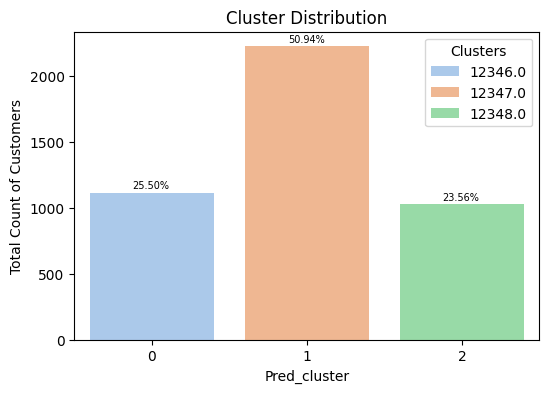

In [83]:
# visualize the Cluster percentage
plt.figure(figsize=[6,4])
ax = sns.countplot(x=Customer_profile_scaled['Pred_cluster'],  palette='pastel')
plt.title("Cluster Distribution")
plt.ylabel("Total Count of Customers")
plt.legend(Customer_profile_scaled['Pred_cluster'].index , title="Clusters")
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(Customer_profile_scaled))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=7, color='black', xytext=(5,5),
               textcoords='offset points')
plt.show()

Insight,

By applying, K-Means Clustering with K=3, we have got Total 3 Clusters i.e. Cluster-0, Cluster-1, and Cluster-2.
Cluster-1, has the Highest number of Customers, around 50.98%.
Cluster-0, has the Second Highest number of Customers, i.e. around 25.32%.
Cluster-2, has the Lowest number of Customers, i.e. around 23.69% only.


In [84]:
### Runing PCA on the scaled dataset and reducing the dimensions in pca_num_components dimensions
from sklearn.decomposition import PCA

pca_num_components = PCA(n_components=3, random_state=10)

reduced_data = pca_num_components.fit_transform(X)    # where X is Customer_Profile_scaled
results = pd.DataFrame(reduced_data,columns=['pca1','pca2','pca3'])

# Importing plotly express to create 3D scatter plot
import plotly.express as px
fig = px.scatter_3d( x=results["pca1"], y=results["pca2"], z=results["pca3"], color=Customer_profile_scaled['Pred_cluster'] )
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0)) # tight layout
fig.show()

In [85]:
# Now, Checking explained_variance_ratio i.e. the amount of information or variance each principal component holds.
pca_num_components.explained_variance_ratio_

array([0.56056889, 0.14895764, 0.10466964])

**Insight,**
>- From explained_variance_ratio we can see that,
>- the principal_component_1 holds 56.6% of the information.
>- the principal_component_2 holds only 14% of the information.
>- and the principal_component_3 holds only 10.4% of the information.<br>

#### Thus, by using PCA we have retained around 81.8% of the orignal information

Let's assign these Cluster Labels to our **Customer_Profile** dataset

In [86]:
# Firstly, lets reset_index and Checking head of our scaled Dataset
Customer_profile_scaled = Customer_profile_scaled.reset_index()
Customer_profile_scaled.head()

CustomerID  frequency  Monetary  Quantity_per_Customer  Avg_Item_Price  \
0     12346.0  -0.978448 -1.003216              -0.974015       -1.568129   
1     12347.0   1.654357  2.216055               2.211493       -0.404344   
2     12348.0  -0.554274  0.611511               2.211493        1.859962   
3     12349.0   0.060047  0.575852              -0.044724        2.327331   
4     12350.0  -0.759048 -0.702775              -0.683888        0.464256   

   Order_Cancellations  Days_As_Customer   Recency  Pred_cluster  
0             0.295993         -1.004183  2.316568             2  
1            -0.694501          1.743685 -0.889050             0  
2            -0.694501          1.118827 -0.164560             0  
3            -0.694501         -1.004183 -0.730258             1  
4            -0.694501         -1.004183  2.167700             2

In [87]:
# Now, Let's merge Scaled Dataset to our Original Dataset to add Cluster Labels.
Customer_profile = pd.merge(Customer_profile, Customer_profile_scaled[['CustomerID', 'Pred_cluster']], on='CustomerID', how='left')
Customer_profile.head()

CustomerID  frequency  Monetary  Quantity_per_Customer  Avg_Item_Price  \
0     12346.0        2.0     0.000                      0        1.040000   
1     12347.0      182.0  3583.145                   2163        2.644011   
2     12348.0       31.0  1797.240                   2163        5.764839   
3     12349.0       73.0  1757.550                    631        6.409000   
4     12350.0       17.0   334.400                    197        3.841176   

   Order_Cancellations  Days_As_Customer  Recency  Pred_cluster  
0                  1.0                 0      327             2  
1                  0.0               365        4             0  
2                  0.0               282       77             0  
3                  0.0                 0       20             1  
4                  0.0                 0      312             2

We can Export these updated **Customer Profile** Dataframe with **Predicted Cluster Informations** to a **CSV** file for Further Analysis or for Data Visulization using tools like Tableau or power bi

In [88]:
# Exporting the Updated Customer Profile Dataset into CSV file
# Customer_Profile.to_csv("Customer_Profile_Clustered.csv", index=False)
# print('Exported')

## Cluster Analysis

Now, let's group the data by Clusters and understanding the characteristics of all the key variables for each cluster.

In [89]:
# Let's visualize the distribution of data across each clusters using Boxplot

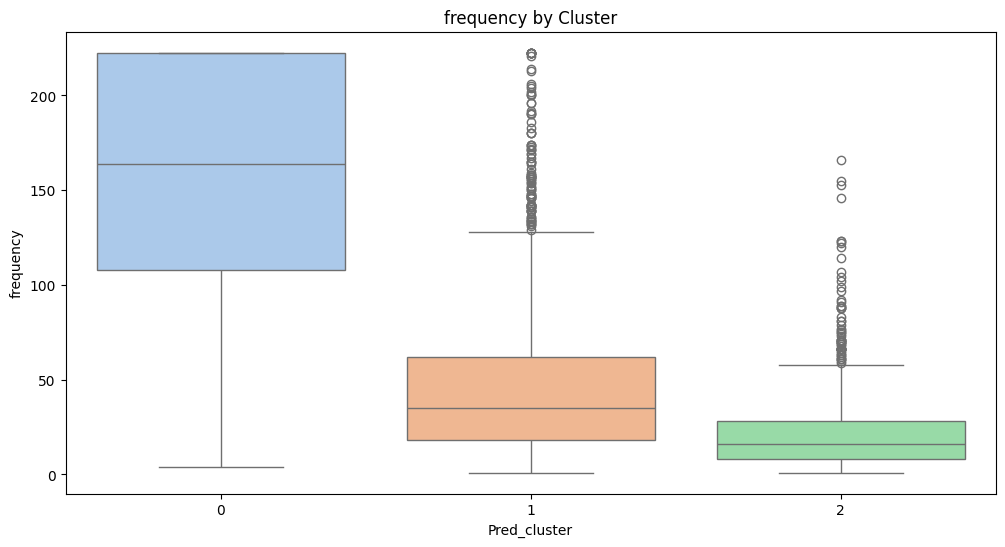

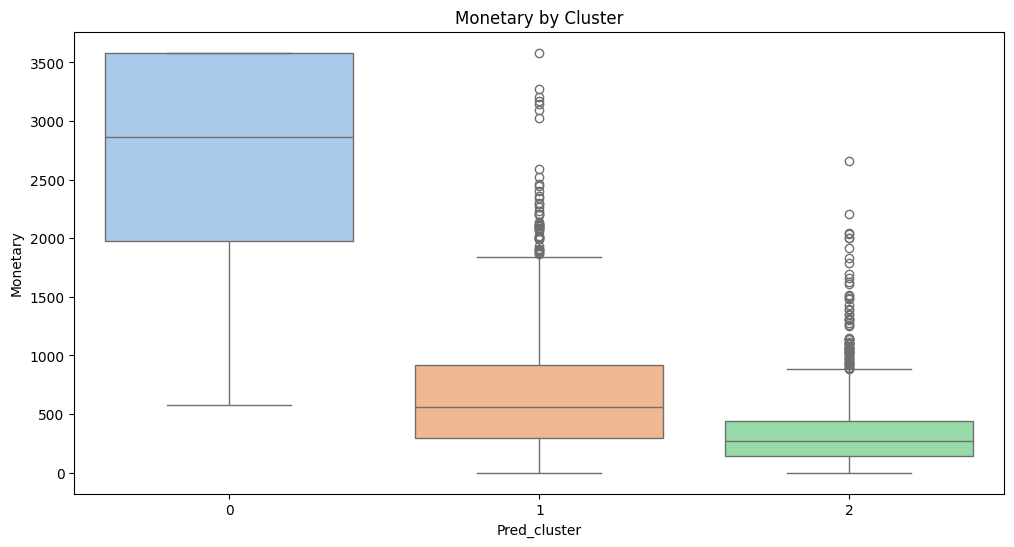

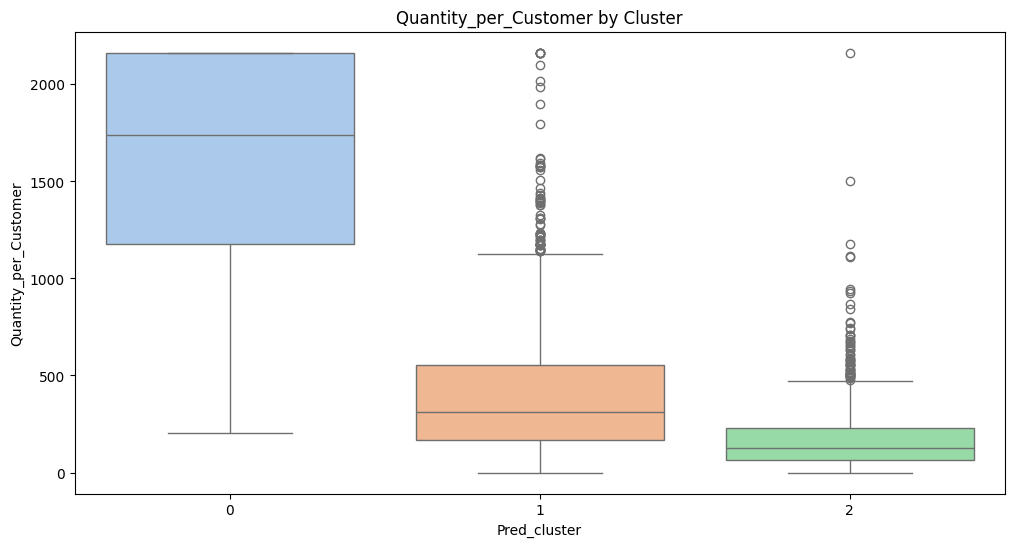

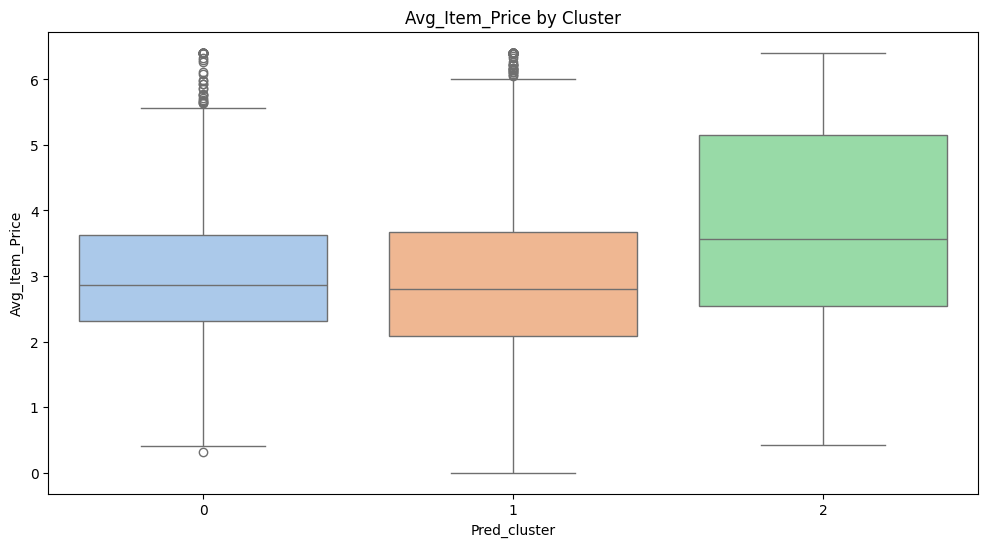

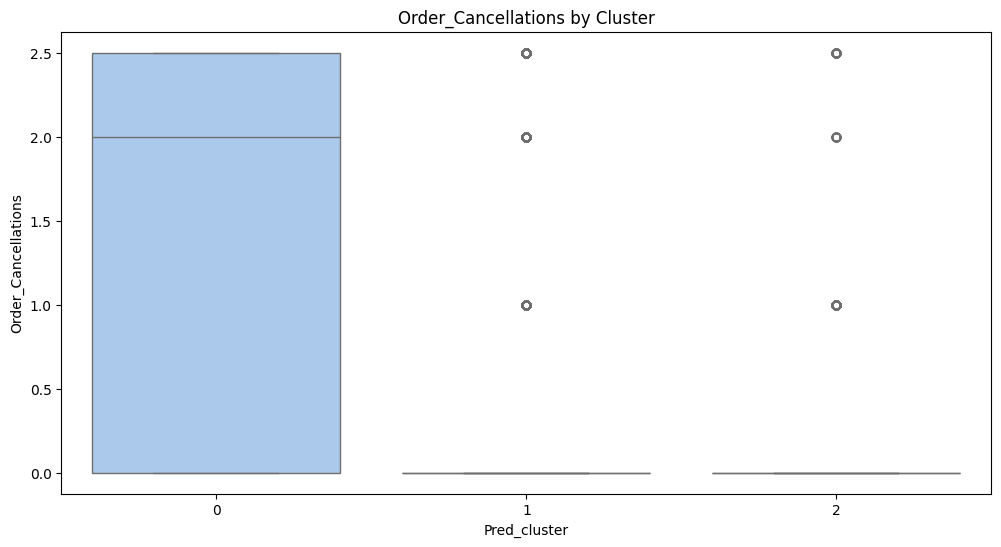

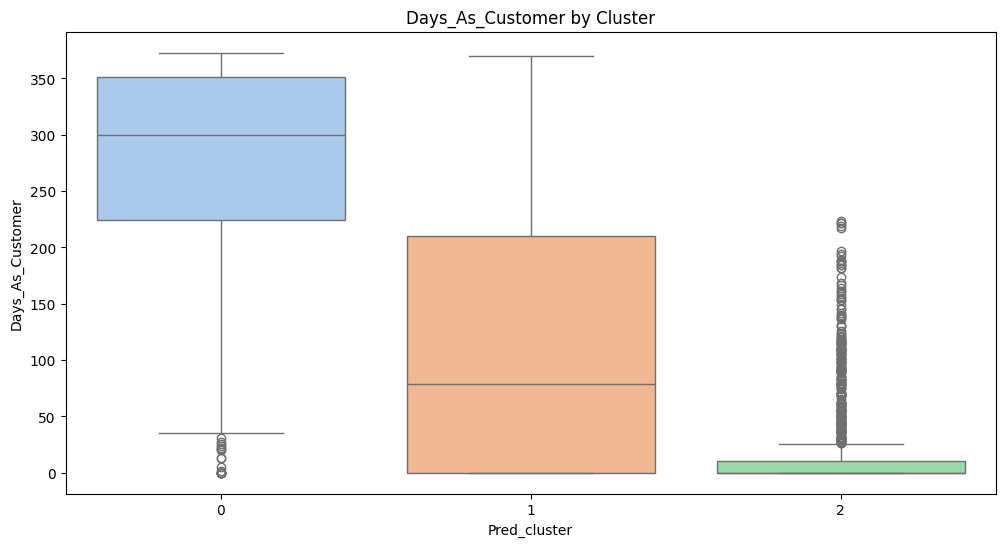

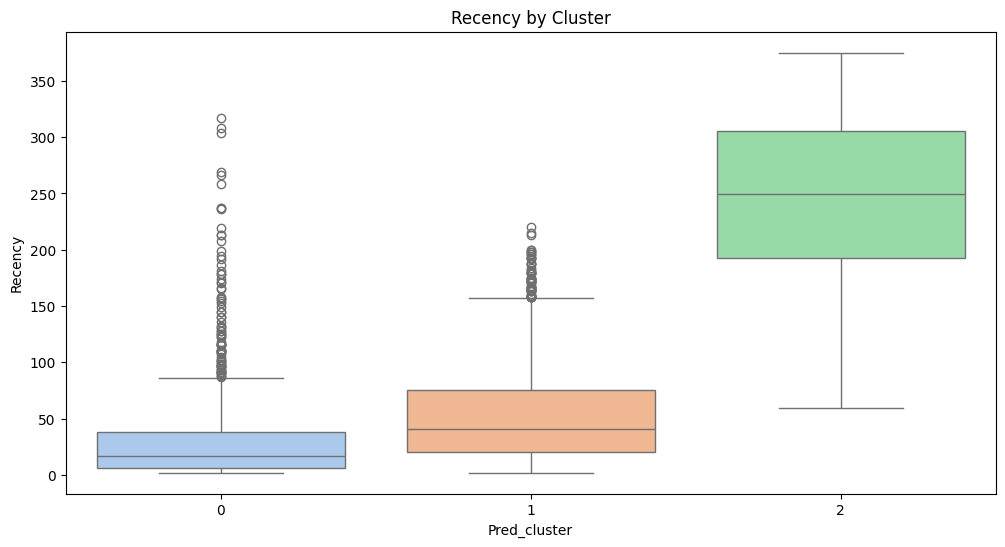

In [90]:
# Visualizing using box plots to understand the distribution of data across each clusters
for col in num_var:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Pred_cluster', y=col, data=Customer_profile, palette='pastel')
    plt.title(f'{col} by Cluster')
    plt.show()
    print(f'\n')

Visualizing the distribution of data using Histogram plot across each Clusters

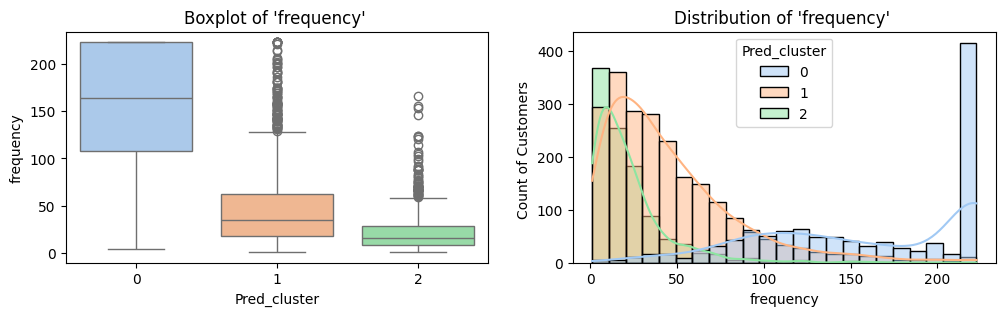

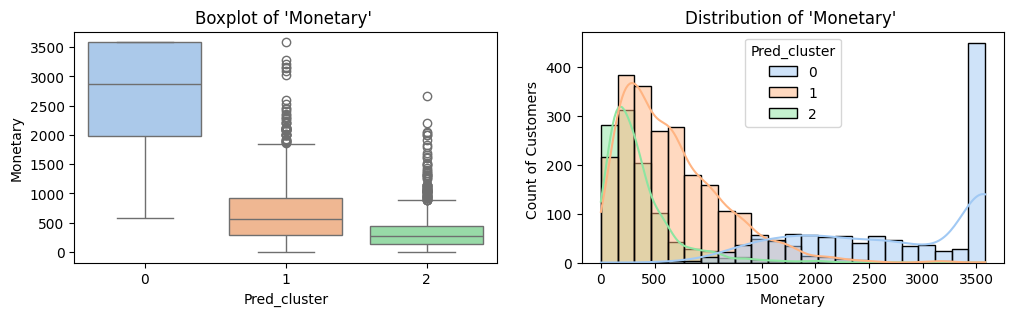

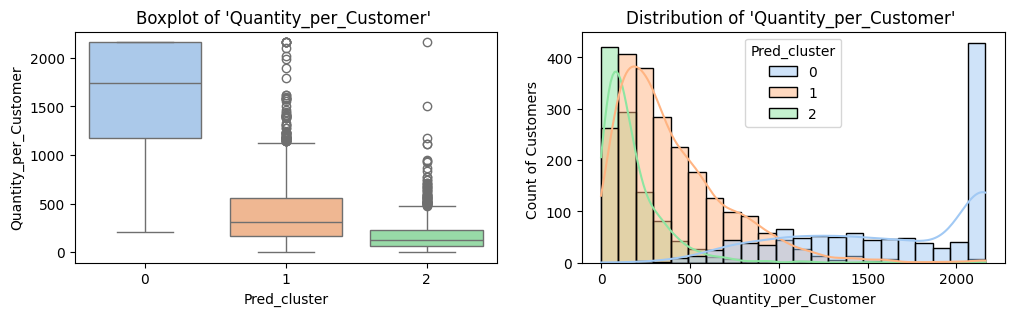

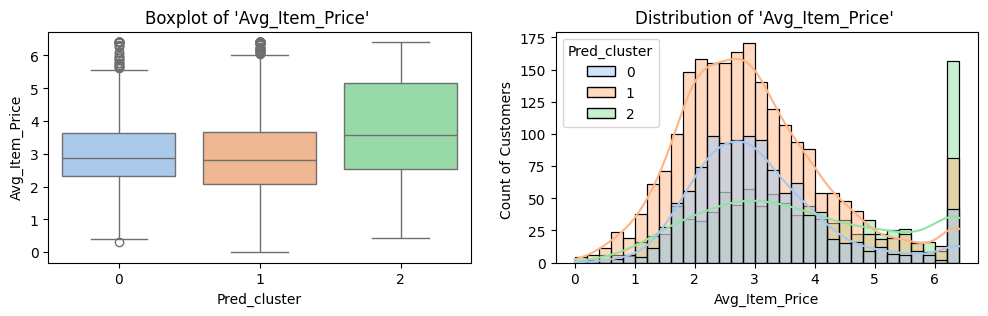

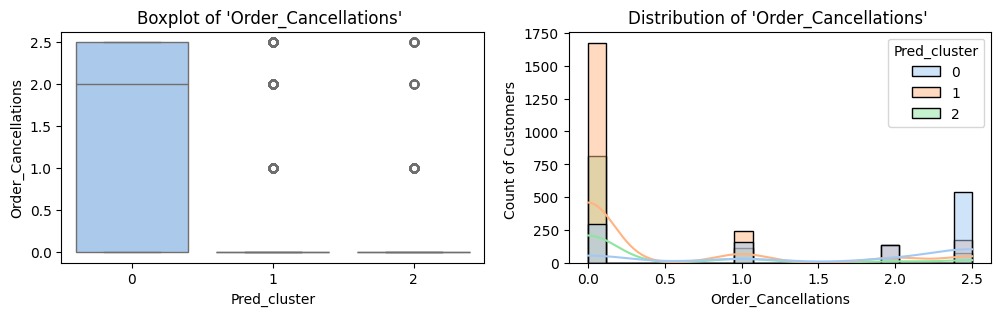

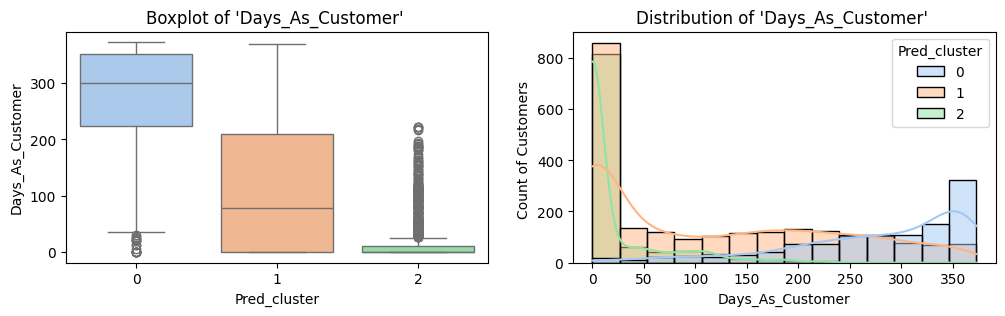

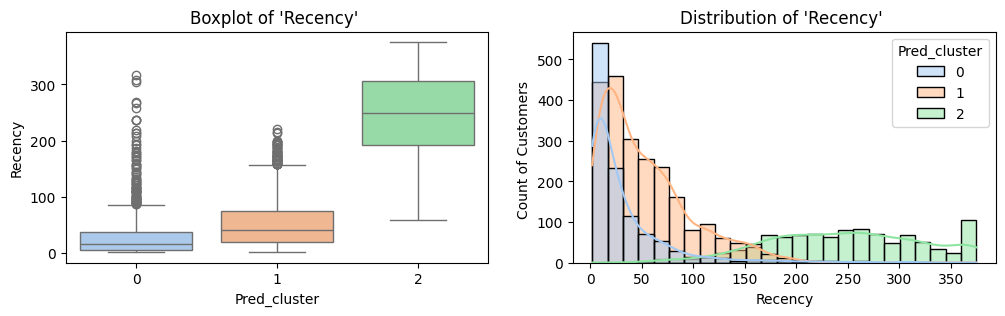

In [91]:
# Visualizing the distribution of data using Histogram plot along with Boxplot across each 'Clusters'
for col in num_var:
    plt.figure(figsize=[12,3])
    plt.subplot(1,2,1)
    sns.boxplot(x=Customer_profile['Pred_cluster'],y=Customer_profile[col], palette="pastel")
    plt.title(f"Boxplot of '{col}' ")

    plt.subplot(1,2,2)
    sns.histplot(x=Customer_profile[col], kde=True, hue=Customer_profile['Pred_cluster'], legend="auto", palette="pastel")
    plt.title(f"Distribution of '{col}' ")
    plt.ylabel(f"Count of Customers ")
    plt.show()


Checking relationship between **`Recency`** & **`Days_As_Customer`** for each **`Cluster`**

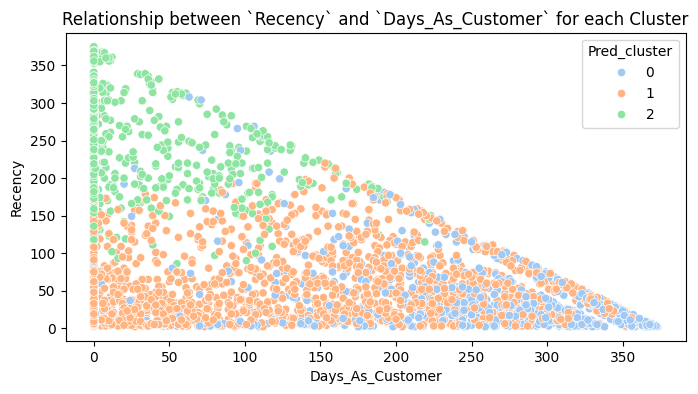

In [92]:
#Checking relationship between `Recency` & `Days_As_Customer` for each Cluster

plt.figure(figsize=[8,4])
sns.scatterplot(y=Customer_profile['Recency'],x=Customer_profile['Days_As_Customer'], hue=Customer_profile['Pred_cluster'],
               palette="pastel")
plt.title("Relationship between `Recency` and `Days_As_Customer` for each Cluster")
plt.show()

In [93]:
 # Visualizing the Clusters in 3D geometry on the basis of RFM (Recency, Frequency, and Monetary value)

import plotly.express as px
fig = px.scatter_3d( x=Customer_profile['Recency'], y=Customer_profile['frequency'],
                     z=Customer_profile['Monetary'] ,color=Customer_profile['Pred_cluster'] )
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Calculating the `Mean` of all the key variables for each cluster

In [94]:
#  Now, grouping Customer profile by Cluster and calculating the `Mean` of all key variables, also droping 'CustomerID' as it not a numerical variable.
Cluster_mean = Customer_profile.groupby('Pred_cluster').mean().drop('CustomerID',axis=1)
Cluster_mean

frequency     Monetary  Quantity_per_Customer  Avg_Item_Price  \
Pred_cluster                                                                   
0             158.677578  2735.255512            1629.782960        3.076265   
1              45.835204   660.139635             401.837899        2.985380   
2              21.560194   351.336437             174.176699        3.803530   

              Order_Cancellations  Days_As_Customer     Recency  
Pred_cluster                                                     
0                        1.576682        275.634081   31.219731  
1                        0.425011        114.704535   52.897620  
2                        0.350485         19.790291  249.052427

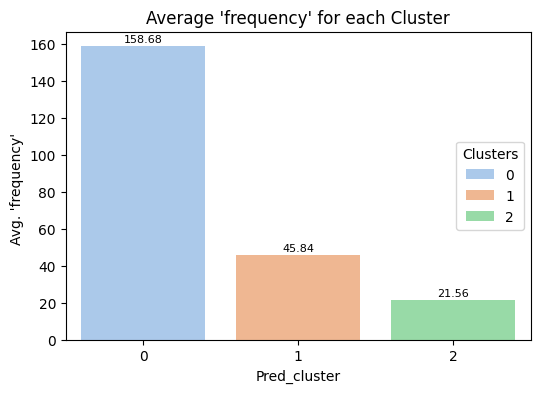

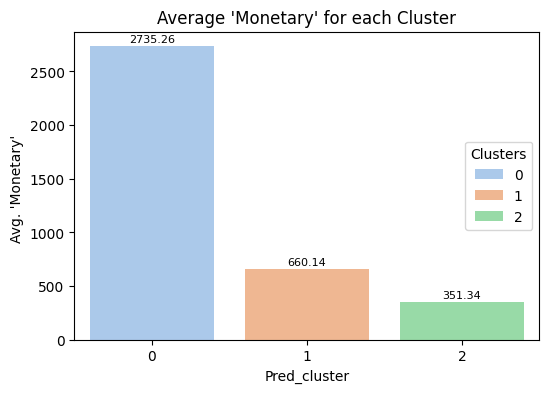

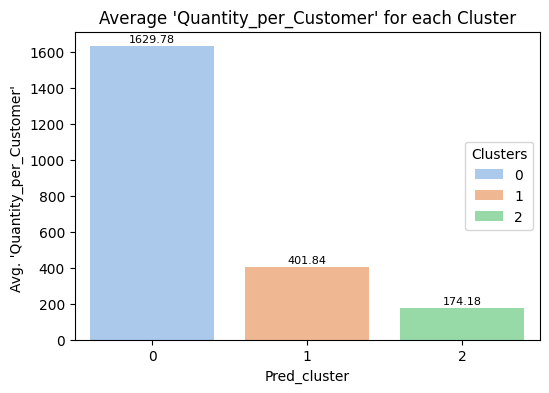

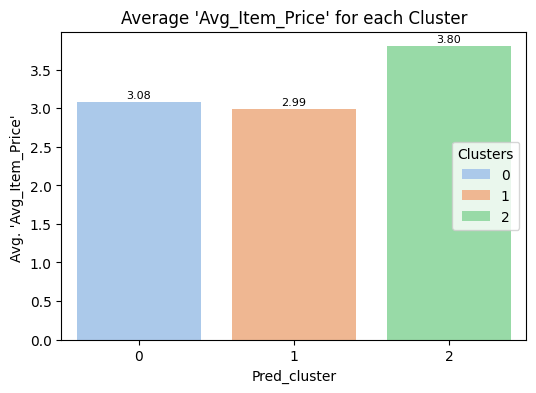

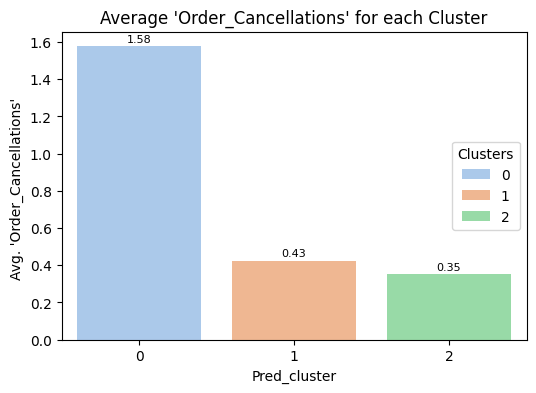

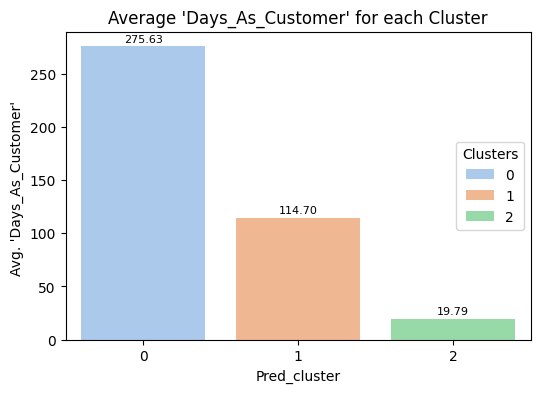

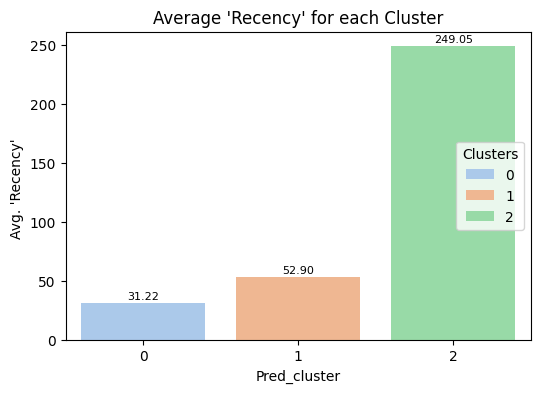

In [95]:
# Let's Visualize the **`Mean`** Vaules of all the Key variables for each Cluster
# Creating barplot to visualize the Mean of all the Key Variables in each Clusters
for col in num_var:
    plt.figure(figsize=[6,4])
    bar = sns.barplot(x=Cluster_mean.index , y= Cluster_mean[col].values , hue=Cluster_mean.index , palette='pastel')
    plt.title(f"Average '{col}' for each Cluster")
    plt.ylabel(f"Avg. '{col}' ")
    plt.legend(title= 'Clusters', loc="center right")
    for point in bar.patches:
        height = point.get_height()
        if height > 0:  # Only annotate if the height is greater than zero
            bar.annotate(f"{point.get_height():.2f}", (point.get_x() + point.get_width() / 2., point.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0,5),
                    textcoords='offset points')
plt.show()

 : Calculating the Median of all the key variables for each cluster





In [96]:
#Now, grouping Customer profile by Cluster and calculating the `Median` of all key variables
Customer_profile.groupby('Pred_cluster').median().drop('CustomerID',axis=1)

frequency  Monetary  Quantity_per_Customer  Avg_Item_Price  \
Pred_cluster                                                               
0                 164.0   2867.20                 1740.0        2.859016   
1                  35.0    557.62                  314.0        2.803934   
2                  16.0    266.81                  125.5        3.563727   

              Order_Cancellations  Days_As_Customer  Recency  
Pred_cluster                                                  
0                             2.0             300.0     17.0  
1                             0.0              79.0     41.0  
2                             0.0               0.0    249.0

 Calculating the **`Standard Deviation`** of all the key variables for each cluster

In [97]:
#grouping Customer profile by Cluster and calculating the `Standard Deviation` of all key variables
Customer_profile.groupby('Pred_cluster').std().drop('CustomerID',axis=1)

frequency    Monetary  Quantity_per_Customer  Avg_Item_Price  \
Pred_cluster                                                                 
0             60.899456  848.127687             533.676922        1.147028   
1             38.850016  482.433356             318.449464        1.270660   
2             21.243824  324.307199             177.918714        1.634974   

              Order_Cancellations  Days_As_Customer    Recency  
Pred_cluster                                                    
0                        1.063594         88.048230  40.855365  
1                        0.812768        116.172931  42.662946  
2                        0.747184         42.177591  73.493362

Creating new dataframe **`Cluster_summary`** to storing these Statistical Summary

In [100]:
#Now, grouping Customer profile by Cluster and performing aggeration ['Mean', 'Median' and `Standard Deviation`] on all key variables.

Cluster_summary = Customer_profile.groupby('Pred_cluster').agg({'frequency'            : ['mean','median','std'],
                                                                'Monetary'             : ['mean','median','std'],
                                                                'Quantity_per_Customer': ['mean','median','std'],
                                                                'Avg_Item_Price'       : ['mean','median','std'],
                                                                'Order_Cancellations'  : ['mean','median','std'],
                                                                'Days_As_Customer'     : ['mean','median','std'],
                                                                'Recency'              : ['mean','median','std']
                                                               }).reset_index()

In [102]:
# Let's check all the Cluster Statistical Summary.
Cluster_summary.T

0           1           2
Pred_cluster                     0.000000    1.000000    2.000000
frequency             mean     158.677578   45.835204   21.560194
                      median   164.000000   35.000000   16.000000
                      std       60.899456   38.850016   21.243824
Monetary              mean    2735.255512  660.139635  351.336437
                      median  2867.200000  557.620000  266.810000
                      std      848.127687  482.433356  324.307199
Quantity_per_Customer mean    1629.782960  401.837899  174.176699
                      median  1740.000000  314.000000  125.500000
                      std      533.676922  318.449464  177.918714
Avg_Item_Price        mean       3.076265    2.985380    3.803530
                      median     2.859016    2.803934    3.563727
                      std        1.147028    1.270660    1.634974
Order_Cancellations   mean       1.576682    0.425011    0.350485
                      median     2.000000    0.000000    0.000000
                      std        1.063594    0.812768    0.747184
Days_As_Customer      mean     275.634081  114.704535   19.790291
                      median   300.000000   79.000000    0.000000
                      std       88.048230  116.172931   42.177591
Recency               mean      31.219731   52.897620  249.052427
                      median    17.000000   41.000000  249.000000
                      std       40.855365   42.662946   73.493362

## Insights based on Cluster Analysis
_Based on our cluster analysis we can conclude the following:_

1. Cluster 0 – Premium/Top Customers
High Frequency: These customers purchase very frequently (159 times).
High Spending: They spend ₹2735 on average, making them your highest revenue contributors.
Loyalty: They've been with you for a long time (276 days on average) and made purchases recently (31 days ago).
Action:
Retain them with loyalty programs, exclusive discounts, and priority support.
Upsell and cross-sell new products.
Regular engagement is key (email, SMS, VIP offers).
2. Cluster 1 – Potential/Moderate Customers
Moderate Frequency: Shop occasionally (46 times).
Medium Spending: Average spend of ₹660.
Risk of Churn: Their last purchase was around 53 days ago.
Action:
Send re-engagement offers.
Provide personalized recommendations.
Incentivize them to become regular customers with bundle deals.
3. Cluster 2 – Churned/Low Value Customers
Very Low Activity: Barely active (22 purchases) and last shopped 249 days ago.
Low Spending: Average spend of ₹351, small order quantities.
New or Lost Customers: Many may be inactive or one-time buyers.
Action:
Run win-back campaigns (special discounts, comeback offers).
Survey them to understand why they left.
Reduce marketing spend here unless they show interest.


 Key Business Takeaways:
80/20 Rule applies: Cluster 0 is likely 20% of customers giving you 80% of revenue.
Prioritize Cluster 0 retention, boost Cluster 1 engagement, and minimize efforts on Cluster 2 unless cost-effective.
Tailored marketing for each group can maximize your profit.










## Conclusion

Cluster 0 – High-Value Loyal Customers (VIP Segment)

Cluster 1 – Moderately Engaged, Price-Sensitive Customers (Growth Potential)

Cluster 2 – Low-Engagement or At-Risk Customers (Reactivation Needed)
